# LOGISTIC REGRESSION CASE STUDY

## Problem Statement:
### Online platform which delivers instant customized loans is building an underwriting layer to determine the creditworthiness of individuals.
### Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

### Structure of Notebook:
1. Exploratory Data Analysis: Understanding the data identifying shape and data types, missing value treatment along with Univariate and Bivariate analysis
2. Data Preprocessing: Feature Engineering, Encoding and Scaling
3. Model Building: Building Logistic Regression model and drawing preliminary insights
4. Model Performance Evaluation
5. Actionable Insights and Recomendations

In [849]:
#importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve, auc
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [691]:
pd.set_option('display.max_columns', None)

## 1. Exploratory Data Analysis

In [692]:
#reading data from csv file

df = pd.read_csv(r"C:\KT Personal\Data Science\Scaler\Projects\Logistic Regression\logistic_regression.txt")

In [693]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Column Profiling:
1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.  
3. int_rate : Interest Rate on the loan  
4. installment : The monthly payment owed by the borrower if the loan originates.  
5. grade : Platform assigned loan grade  
6. sub_grade : Platform assigned loan subgrade  
7. emp_title :The job title supplied by the Borrower when applying for the loan.    
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.  
10. annual_inc : The self-reported annual income provided by the borrower during registration.  
11. verification_status : Indicates if income was verified by Platform, not verified, or if the income source was verified  
12. issue_d : The month which the loan was funded  
13. loan_status : Current status of the loan - **Target Variable**  
14. purpose : A category provided by the borrower for the loan request.  
15. title : The loan title provided by the borrower  
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.  
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened  
18. open_acc : The number of open credit lines in the borrower's credit file.  
19. pub_rec : Number of derogatory public records  
20. revol_bal : Total credit revolving balance   
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  
22. total_acc : The total number of credit lines currently in the borrower's credit file  
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F  
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers  
25. mort_acc : Number of mortgage accounts.  
26. pub_rec_bankruptcies : Number of public record bankruptcies  
27. Address: Address of the individual  

>- Can see missing values in some columns

In [694]:
df.shape

(396030, 27)

>- Dataset contains 396030 rows and is farly large
>- It contains **26 features and one target variable, i.e. loan_status**

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

>- **Can convert column 'issue_d' and 'earliest_cr_line' to datetime type from current object type**


In [696]:
df['issue_d']= pd.to_datetime(df['issue_d']).dt.strftime('%m/%Y')

In [697]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line']).dt.strftime('%m/%Y')

In [698]:
#drawing random sample of 5 rows from data

df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
211144,12000.0,36 months,10.99,392.83,B,B4,South Coast Systems,2 years,RENT,78500.0,Not Verified,02/2010,Fully Paid,credit_card,credit card debt consolidation,14.14,05/2001,5.0,0.0,0.0,0.0,11.0,f,INDIVIDUAL,NaN,0.0,"158 Barnett Harbors Suite 725\r\nJoseside, FL ..."
176830,20000.0,60 months,20.50,535.46,E,E4,Sales,3 years,RENT,85000.0,Source Verified,01/2016,Fully Paid,major_purchase,Major purchase,21.50,01/2004,10.0,0.0,9756.0,48.3,35.0,w,INDIVIDUAL,1.0,0.0,"46779 Scott Place\r\nSouth Sarah, SD 00813"
51779,8500.0,36 months,8.39,267.90,A,A5,Engineer,7 years,MORTGAGE,118000.0,Not Verified,08/2014,Fully Paid,car,Car financing,14.71,07/2002,10.0,0.0,10419.0,52.1,33.0,f,INDIVIDUAL,5.0,0.0,"9611 Young Ways Suite 335\r\nWest Emilyburgh, ..."
215068,1125.0,36 months,20.31,41.99,D,D5,US ARMY,9 years,RENT,52000.0,Source Verified,08/2013,Fully Paid,moving,Moving and relocation,16.98,12/2004,4.0,0.0,4537.0,70.9,13.0,f,INDIVIDUAL,0.0,0.0,"899 Hamilton Rue Apt. 516\r\nAprilchester, WA ..."
63934,35000.0,36 months,11.49,1154.00,B,B5,"anesthesiologist,MD.",5 years,RENT,215000.0,Not Verified,07/2016,Fully Paid,debt_consolidation,Debt consolidation,16.70,03/1997,10.0,0.0,22134.0,86.5,28.0,w,INDIVIDUAL,0.0,0.0,"47920 Arellano Street\r\nElizabethbury, OR 30723"


In [699]:
#checking values in 'term' and 'emp_length'

print("'term' - ",df['term'].unique())
print()
print("'emp_length' - ",df['emp_length'].unique())

'term' -  [' 36 months' ' 60 months']

'emp_length' -  ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


>- As both features contain numerical data, 'months' and 'years' can be removed from values
>- emp_length of 10+ will be considered as 10 and < 1 will be considered as 0

In [700]:
#removing string 'months' from term column
df['term'] = df['term'].str.replace(' months', '')

In [701]:
#removing string 'years' from term column
df['emp_length'] = df['emp_length'].str.replace(' years','')

In [702]:
df['emp_length'] = df['emp_length'].str.replace('+','')

C:\Users\krist\AppData\Local\Temp\ipykernel_4880\3392537332.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emp_length'] = df['emp_length'].str.replace('+','')


In [703]:
df['emp_length'] = df['emp_length'].str.replace(' year', '')

In [704]:
df['emp_length'] = df['emp_length'].str.replace('< 1', '0')

In [705]:
# converting 'emp_length' to float type from object type

df['emp_length'] = df['emp_length'].astype('float')

#### Dropping Features:
>- As we **do not need the 'address' feature for our model, it can be dropped**.


In [706]:
df.drop('address', axis = 1, inplace = True)

In [707]:
#checking datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  float64
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [708]:
#statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
emp_length,377729.0,5.938578,3.645623,0.00,3.00,6.00,10.00,10.00
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30


### Insights:
>- **loan_amount**- Mean and median is slightly away at 14000 and 12000 with standard deviation of 8300 hinting at presence of outliers
>- **installment** - Mean and median is away from each other at 431 and 375 with a std dev of 250 hinting at presence of outliers
>- **annual_inc** - Mean and median is away from each other at 74000 and 64000 with a std dev of 61000 hinting at presence of outliers
>- **dti** - Max value is 9999 and min value is 0.00. This needs to be checked for outliers as mean is 17.37 an dmedian is 16.91


In [709]:
#summary of total count and unique elements in categorical data

df.describe(include = 'object').T

,count,unique,top,freq
term,396030,2,36,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,10/2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507
title,394275,48817,Debt consolidation,152472


### Insights:
>- Features with **binary values: term, initial_list_status**
>- title contains almost 49000 unique values and 
>- **emp_title contains 173105 categories in data set of 396000. Due to such high number of classes, it will have insignificant impact on model and this feature may be dropped**
>- **Similarly variable 'title' has 48817 unique values and is a subset of feature called 'purpose'. Therefore it can also be dropped as its influence will be captured in the model.**

In [710]:
#dropping emp_title and title

df.drop('emp_title', axis = 1, inplace = True)
df.drop('title', axis = 1, inplace = True)

### Missing value treatment

In [711]:
#check for missing values

miss_p = np.round((df.isna().sum()/df.shape[0])*100,2).values
miss = df.isna().sum().values
missing = pd.DataFrame({'Number':miss, 'Percent':miss_p}, index = df.columns).sort_values('Percent', ascending = False)
missing[missing['Percent']!=0]

,Number,Percent
mort_acc,37795,9.54
emp_length,18301,4.62
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


### Insights:
>- As missing values in **title, pub_rec_bankruptcies and revol_util is very low, those rows can be dropped**
>- We can replace missing values in **mort_acc by comparing with home_ownership category**
>- For **emp_length, median salary for each emp_length can be calculated and missing values can be replaced by comparing with median salary brackets and replacing value with corresponding emp_length**


In [712]:
#dropping null values in 'title','revol_util','pub_rec_bankruptcies'

df.dropna(subset = ['revol_util','pub_rec_bankruptcies'], inplace = True)

In [713]:
df = df.reset_index(drop= True)

In [714]:
# missing value imputation in mort_acc by comparing with home_ownership.
# if home_ownership is MORTGAGE, mort_acc can be updated with 1

for i in df.loc[df['mort_acc'].isnull()].index:
    if df['home_ownership'].iloc[i]=='MORTGAGE':
        df['mort_acc'].iloc[i]=1
    else:
        df['mort_acc'].iloc[i]=0

C:\Users\krist\AppData\Local\Temp\ipykernel_4880\2207510842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mort_acc'].iloc[i]=0
C:\Users\krist\AppData\Local\Temp\ipykernel_4880\2207510842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mort_acc'].iloc[i]=1


> **Missing value replacement for emp_length:**

In [715]:
#calculating median salary for each value of emp_length

df['emp_length'].fillna(100, inplace = True)   #replaced null values with 100 in emp_length

emp_length_median = {}

for i in sorted(df['emp_length'].unique()):
    if i == 100:
        continue
    emp_length_median[i] = df.loc[df['emp_length']==i]['annual_inc'].median()
emp_length_median

{0.0: 58000.0,
 1.0: 60000.0,
 2.0: 60000.0,
 3.0: 60000.0,
 4.0: 61000.0,
 5.0: 61000.0,
 6.0: 62000.0,
 7.0: 63500.0,
 8.0: 65000.0,
 9.0: 65000.0,
 10.0: 70000.0}

In [716]:
#function to check emp_length value for a salary amount by comparing with median salaries dictionary

def check_emp_length(x):     # x is the annual_income for which employee length needs to be calculated
    c = 0
    for i in emp_length_median.keys():
        if x >= emp_length_median[i]:
            c = i
            continue
        if x < emp_length_median[i]:
            break
    return c        

In [717]:
x = df.loc[df['emp_length']==100]['annual_inc']
temp = []
for i in x:
    temp.append(check_emp_length(i))
df['emp_length'].loc[df['emp_length']==100] = temp

C:\Users\krist\AppData\Local\Temp\ipykernel_4880\3433401963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length'].loc[df['emp_length']==100] = temp


In [718]:
# as employment length is decrete in our dataset with integer values between 1 and 10,
# it can be converted to categorical data type

df['emp_length'] = df['emp_length'].astype('object')

In [719]:
# checking for missing values after imputation

df.isna().any().sum()

0

>- **No missing values remaining in the dataset**
### Outlier Treatment for numerical variables

In [720]:
#check outliers in Chance of Admit using IQR method

# creating function to check outliers and remove them

def check_outliers(x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    outliers = df.loc[(df[x] < (q1 - 1.5*iqr)) | (df[x]> (q3 + 1.5*iqr))]
    perc = np.round((outliers.shape[0]/df.shape[0]*100),2)
#     print(f'Number of datapoints in outliers in variable {x}= {perc} %')
    return perc

def remove_outliers(df, x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    df = df.loc[(df[x] > (q1 - 1.5*iqr)) & (df[x]< (q3 + 1.5*iqr))]
    return df

In [721]:
num_cols = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

In [722]:
ol = []
for i in num_cols:
    ol.append(check_outliers(i))
pd.DataFrame(ol, index= num_cols, columns= ['Perc of Outliers by IQR method'])

,Perc of Outliers by IQR method
loan_amnt,0.05
int_rate,0.80
installment,2.81
emp_length,0.00
annual_inc,4.21
dti,0.07
open_acc,2.61
revol_bal,5.37
revol_util,0.00
total_acc,2.15


>- **annual_inc and revol_bal show high presence of outliers around 5% and can be further checked with box plot**

<AxesSubplot:ylabel='revol_bal'>

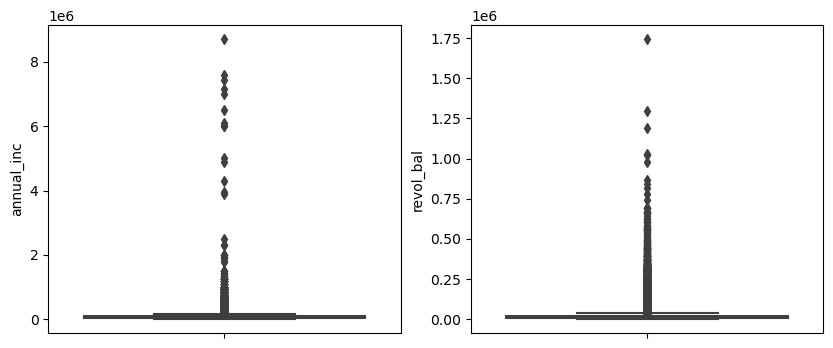

In [723]:
#box plot for annual_inc and revol_bal

plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
sns.boxplot(y = df['annual_inc'])

plt.subplot(1,2,2)
sns.boxplot(y = df['revol_bal'])

>- **Box plot shows heavy presence of outliers in the upper zone and may be removed**

In [724]:
# outlier removal in annual_inc and revol_bal

df = remove_outliers(df, 'annual_inc')
df = remove_outliers(df, 'revol_bal')

<AxesSubplot:ylabel='revol_bal'>

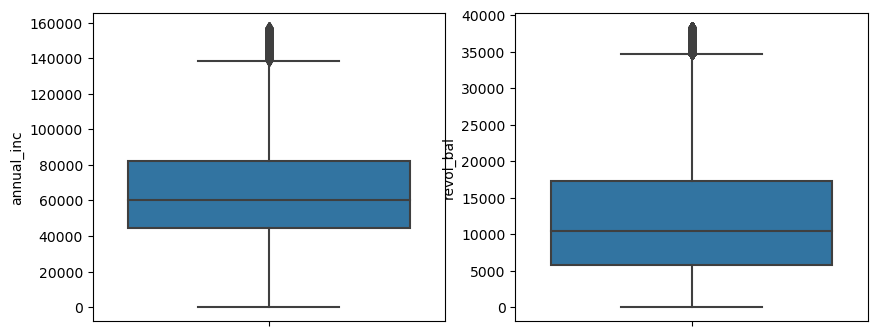

In [725]:
#checking box plot again for annual_inc and revol_bal

plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
sns.boxplot(y = df['annual_inc'])

plt.subplot(1,2,2)
sns.boxplot(y = df['revol_bal'])

>- **Outliers removed and features are balanced.**

In [726]:
# checking percentage of outliers in numerical columns again

ol = []
for i in num_cols:
    ol.append(check_outliers(i))
pd.DataFrame(ol, index= num_cols, columns= ['Perc of Outliers by IQR method'])

,Perc of Outliers by IQR method
loan_amnt,2.46
int_rate,0.95
installment,2.74
emp_length,0.00
annual_inc,2.23
dti,0.07
open_acc,2.24
revol_bal,1.84
revol_util,0.00
total_acc,2.11


#### Outliers are very low and further removal may impact the model. Outlier removal completed

### Feature Engineering

In [727]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10.0,RENT,117000.0,Not Verified,01/2015,Fully Paid,vacation,26.24,06/1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,4.0,MORTGAGE,65000.0,Not Verified,01/2015,Fully Paid,debt_consolidation,22.05,07/2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,0.0,RENT,43057.0,Source Verified,01/2015,Fully Paid,credit_card,12.79,08/2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,6.0,RENT,54000.0,Not Verified,11/2014,Fully Paid,credit_card,2.60,09/2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,9.0,MORTGAGE,55000.0,Verified,04/2013,Charged Off,credit_card,33.95,03/1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


#### Before univariate analysis, we can modify few features to suit our model building process without any data loss
>1. **pub_rec, mort_acc and pub_rec_bankruptcies** can be converted to flag based binary feature where 1 means any value greater than 1 and 0 means all 0 values.
>2. **term, pub_rec, mort_acc and pub_rec_bankruptcies** can be converted to categorical data type as it has only 2 values 36 and 60 (months).
>3. **Created a new feature issue_earliest_datediff by calculating difference between issue date and earliest credit line opening date** and earliest credit date features can be dropped as it cannot be used in model directly.
>4. **Month and year from issue date** can be extracted separately to see if that has some impact on loan quality. Issue date column may be dropped

In [728]:
# replacing any value >= 1 as 1 

df['pub_rec'].loc[df['pub_rec']>=1] = 1

In [729]:
df['pub_rec_bankruptcies'].loc[df['pub_rec_bankruptcies']>=1] =1

In [730]:
df['mort_acc'].loc[df['mort_acc']>=1] =1

In [731]:
# converting binary value features' data types to categorical from numerical

df['term'] = df['term'].astype('object')
df['mort_acc'] = df['mort_acc'].astype('object')
df['pub_rec'] = df['pub_rec'].astype('object')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('object')

In [732]:
#creating feature issue_earliest_datediff by findinf difference between issue date and earliest credit line opening date

df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_earliest_datediff'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [733]:
#extracting month and year from issue date

df['issue_month'] = df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year

In [734]:
#converting issue month and year to categorical type

df['issue_month'] = df['issue_month'].astype('object')
df['issue_year'] = df['issue_year'].astype('object')

In [735]:
# dropping issue date and earliest credit line date columns

df.drop(['issue_d','earliest_cr_line'], axis =1, inplace = True)

In [736]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

### Univariate Analysis:

In [737]:
# function for univariate analysis of numerical variables and categorical variables

def numerical_uni(col):
    
    plt.figure(figsize=[10,3])
    plt.subplot(1,2,1)
    sns.histplot(x = df[col], kde= True, bins = 20)

    plt.subplot(1,2,2)
    sns.histplot(x = df[col], stat = 'percent', cumulative= True, bins = 20)
    

def categorical_uni(col):
    plt.figure(figsize=[5,3])
    sns.countplot(x = col, data = df,order = sorted(df[col].unique()))
    percent = df[col].value_counts(normalize = True, sort= False).to_frame().rename({col:'Percentage'}, axis = 1)
    percent = percent*100
    percent = percent.reset_index().rename({'index':'Category'}, axis = 1)
    percent = percent.sort_values('Category')
    percent.reset_index(drop = True, inplace= True)
    return percent.T

,0,1
Category,Charged Off,Fully Paid
Percentage,19.897429,80.102571


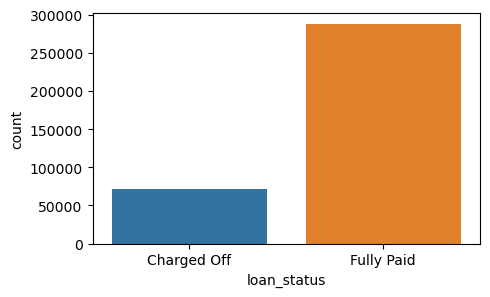

In [738]:
# loan_status
categorical_uni('loan_status')

### Insights:
>- **Loan status is our target variable for this model building process**
>- **Charged off class will be considered as positive outcome and Fully paid as negative outcome while building the model**
>- **The data is slightly imbalanced as 80% loans belong to Fully Paid category and only 20% belong to Charged off category**
>- Class weight adjustment might be needed while building Logisitic Regression model to account for this imbalance

,count,mean,std,min,25%,50%,75%,max
loan_amnt,359750.0,13348.589993,7794.309643,725.0,7500.0,12000.0,18000.0,40000.0


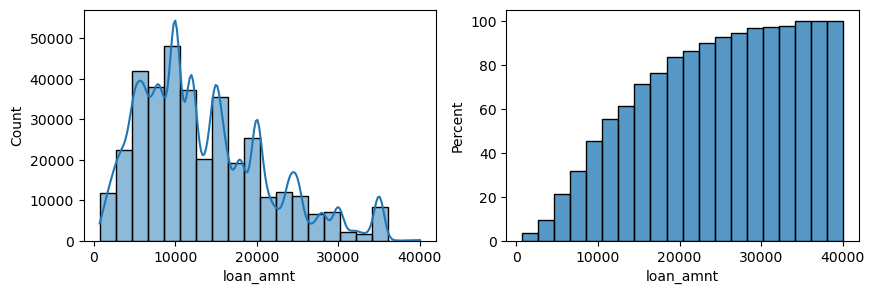

In [739]:
#loan_amount

numerical_uni('loan_amnt')
df['loan_amnt'].describe().to_frame().T

### Insights:
>- Mean and median are around 12000-13000 while maximum loan amount is at 40000. 
>- **75% of the loans are below 18000 which shows majority of loans are small loans**
>- Most loan amounts range between 7000 and 12000

,count,mean,std,min,25%,50%,75%,max
int_rate,359750.0,13.683914,4.443986,5.32,10.64,13.35,16.55,30.99


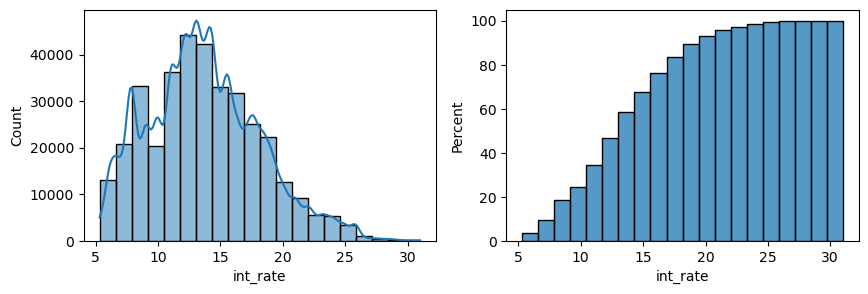

In [740]:
#int_rate

numerical_uni('int_rate')
df['int_rate'].describe().to_frame().T

### Insights:
>- Mean and median of interest rates are close around 13.5%. 
>- 75% of the loans have interest rates below 16.55% while the maximum value is at 30.99%
>- Most loans have interest rates between 10 and 16%

,count,mean,std,min,25%,50%,75%,max
installment,359750.0,409.44605,232.438234,19.87,242.69,360.38,532.35,1479.49


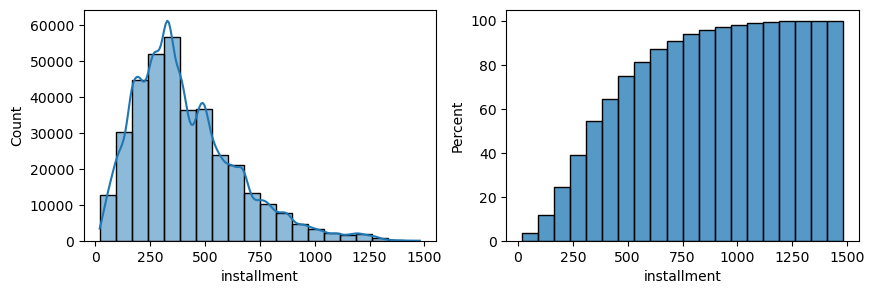

In [741]:
#installment

numerical_uni('installment')
df['installment'].describe().to_frame().T

### Insights:
>- Monthly installment amount ranges from 20 to 1480 while mean and median are at 400 and 360 approximately
>- 75% of the installment amounts are below 530 which shows low value for majority of loans and corresponding installments
>- Most values range between 200 to 500 approximately

,count,mean,std,min,25%,50%,75%,max
annual_inc,359750.0,65508.000445,28837.684049,0.0,44248.5,60000.0,82000.0,157467.7


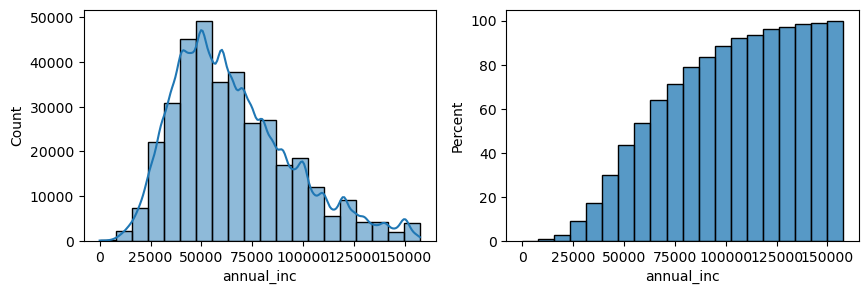

In [742]:
# annual_inc

numerical_uni('annual_inc')
df['annual_inc'].describe().to_frame().T

### Insights:
>- Mean and median annual incomes lie between 60000 and 65000. 
>- 75% of the customers have annual income below 82000 while maximum value is 157000.
>- Most customers have an annual income between 45000 and 80000

,count,mean,std,min,25%,50%,75%,max
dti,359750.0,17.42162,18.708185,0.0,11.38,16.95,22.98,9999.0


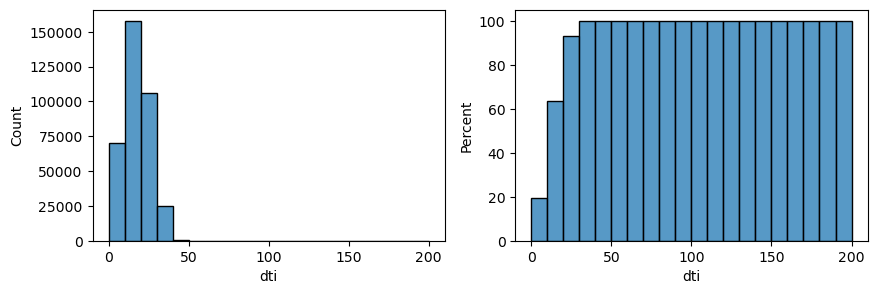

In [743]:
# dti

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
sns.histplot(x = df['dti'], bins = 20, binrange = [0,200])

plt.subplot(1,2,2)
sns.histplot(x = df['dti'], stat = 'percent', cumulative= True, bins = 20, binrange= [0,200])

df['dti'].describe().to_frame().T

### Insights:
>- Mean and median are close to each other around 17
>- 75% values of dti lie below 23 and almost all values are  below 50 whereas maximum value is like an outlier at 1622.
>- That value may be removed as it may affect the model negatively creating a bias

In [744]:
df.loc[df['dti']==1622]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_earliest_datediff,issue_month,issue_year
350136,24000.0,36,9.16,764.99,B,B2,0.0,MORTGAGE,600.0,Source Verified,Fully Paid,debt_consolidation,1622.0,16.0,0.0,24733.0,58.5,21.0,f,JOINT,1.0,0.0,5783,6,2016


>- Annual income at 600 is an outlier causing dti to be so high. This row may be removed

In [745]:
#dropping that row

df = df.loc[df['dti']!=1622]
df.reset_index(drop = True, inplace = True)

,count,mean,std,min,25%,50%,75%,max
open_acc,359749.0,11.072078,4.991959,1.0,8.0,10.0,14.0,76.0


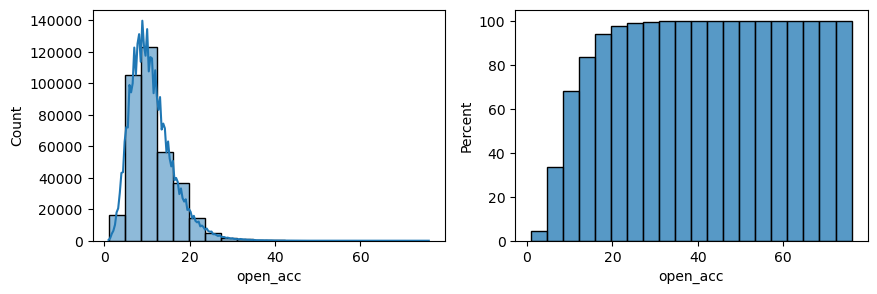

In [746]:
#open_acc

numerical_uni('open_acc')
df['open_acc'].describe().to_frame().T

### Insights:
>- Mean and median open_acc values are almost same around 11
>- 75% of customers have open credit lines below 14 while the maximum open credit lines are at 76

,count,mean,std,min,25%,50%,75%,max
revol_bal,359749.0,12362.229324,8634.620543,0.0,5713.0,10360.0,17274.0,38336.0


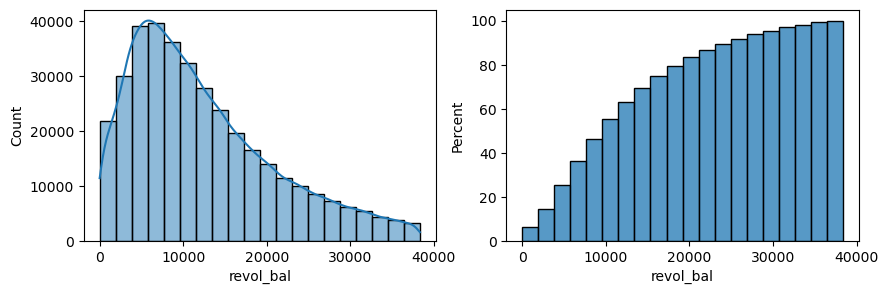

In [747]:
# revol_bal

numerical_uni('revol_bal')
df['revol_bal'].describe().to_frame().T

### Insights:
>- Mean and median values are not close at 12300 and 10300 respectively
>- 75% of customers have credit revolving balance less than 17300 while highest revolving credit balance is at 38000
>- Shows most customers have lower revolving credit balance

,count,mean,std,min,25%,50%,75%,max
revol_util,359749.0,53.096524,24.31328,0.0,35.2,53.9,71.9,892.3


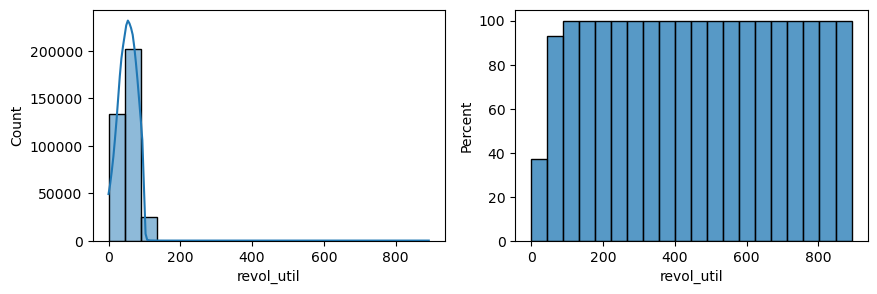

In [748]:
#revol_util

numerical_uni('revol_util')
df['revol_util'].describe().to_frame().T

### Insights:
>-Revolving line utilization rate has mean and median close to each other around 53%
>- Most customers have utilization rate below 72.
>- We can check the number of customers with utilization rate more than 100

In [749]:
#checking number of customers have a revol_util greater than 100

df.loc[df['revol_util']>100].shape[0]

976

>- 968 customers have a revolving line utilization rate greater than 100

,count,mean,std,min,25%,50%,75%,max
total_acc,359749.0,24.803207,11.657176,2.0,16.0,23.0,31.0,135.0


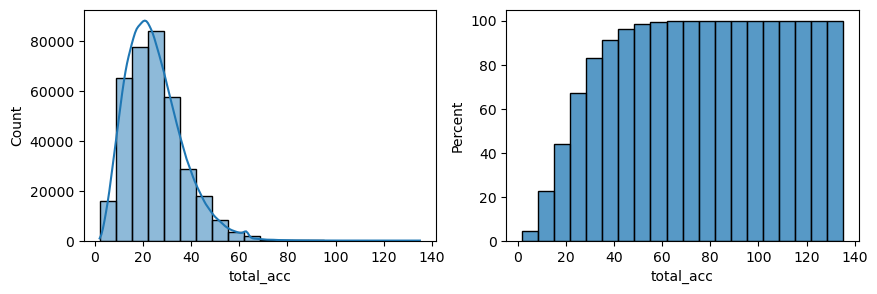

In [750]:
# total_acc

numerical_uni('total_acc')
df['total_acc'].describe().to_frame().T

### Insights:
>- Total number of credit line mean and median values are close at 23-24.
>- 75% of customers have total credit lines below 31 while maximum value is 135. 
>- Most customers have credit lines between 15 and 25

,count,mean,std,min,25%,50%,75%,max
issue_earliest_datediff,359749.0,5607.230886,2579.363079,1095.0,3896.0,5113.0,6850.0,25627.0


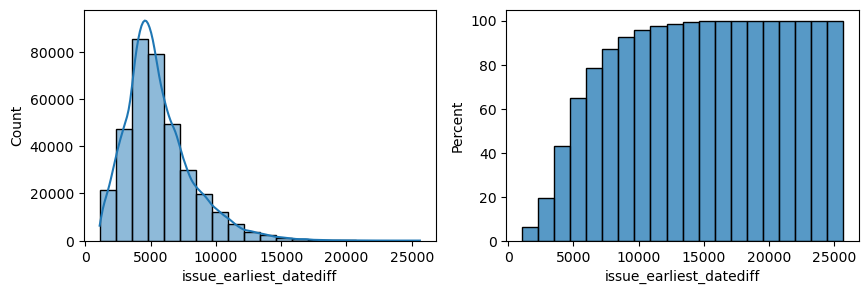

In [751]:
#issue_earliest_datediff

numerical_uni('issue_earliest_datediff')
df['issue_earliest_datediff'].describe().to_frame().T

### Insights:
>- Mean and median values for number of days between issue and earliest credit line are far at 5600 and 5100 respectively
>- 75% of customers had less than 6850 days between loan issue date and earliest credit line date
>- This data can be checked for outliers once

<AxesSubplot:ylabel='issue_earliest_datediff'>

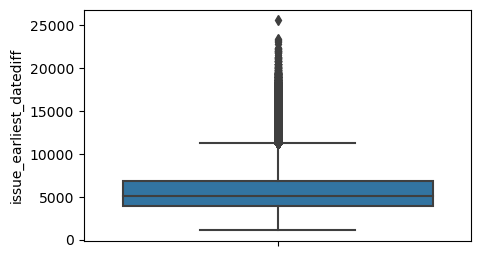

In [752]:
plt.figure(figsize= [5,3])
sns.boxplot(y = df['issue_earliest_datediff'])

>- Can see many outliers in the higher zone and may be removed

In [753]:
#check and remove outliers in issue_earliest_datediff

p = check_outliers('issue_earliest_datediff')
print(f'Percentage of outliers in issue_earliest_datediff: {p}')

df = remove_outliers(df,'issue_earliest_datediff')

Percentage of outliers in issue_earliest_datediff: 3.56


,0,1
Category,36,60
Percentage,76.845139,23.154861


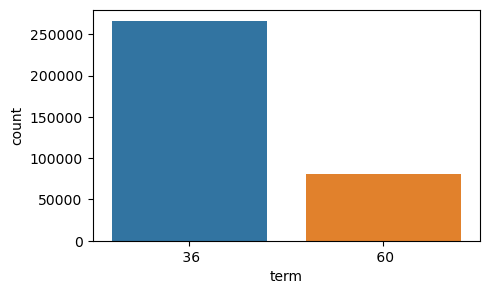

In [754]:
#term

categorical_uni('term')

### Insights:
>- 76% loans are of shorter term of 36 months

,0,1,2,3,4,5,6
Category,A,B,C,D,E,F,G
Percentage,15.423218,29.440081,27.086258,16.319666,7.966563,3.000649,0.763566


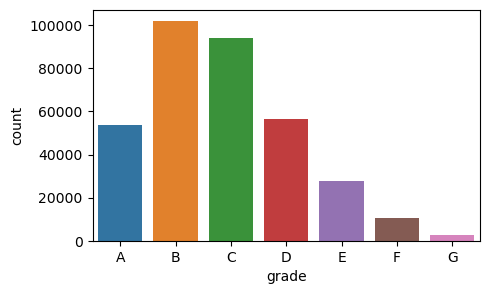

In [755]:
# grade

categorical_uni('grade')

### Insights:
>- Grade B and C share highest number of loans accounting for 56% of all loans
>- Grade F and G account for the lowest number of loans

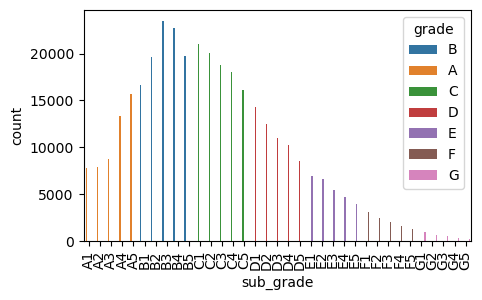

In [756]:
#sub_grade
plt.figure(figsize=[5,3])
sns.countplot(x = 'sub_grade', data = df,order = sorted(df['sub_grade'].unique()), hue = 'grade')
plt.xticks(rotation = 90)
plt.show()

### Insights:
>- Most loans belong to sub-grades under B and C as expected. 

,0,1,2,3,4,5,6,7,8,9,10
Category,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.00000,7.000000,8.000000,9.000000,10.000000
Percentage,11.367587,6.713267,9.271168,8.344167,6.204511,6.902068,5.45997,5.406068,4.919507,4.077827,31.333862


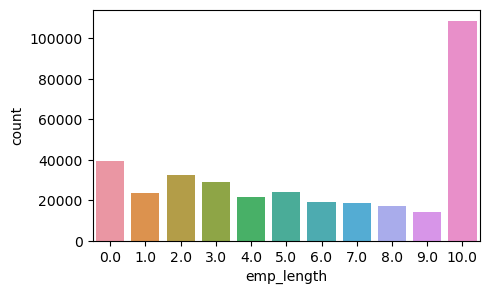

In [757]:
#emp_length

categorical_uni('emp_length')

### Insights:
>- Most customers (31%) have employment length of 10 or more years 
>- Data is skewed wrt this feature as all other categories have customers less than 1/3rd of 10+ years category

,0,1,2,3,4,5
Category,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
Percentage,0.000865,47.686099,0.006918,0.028536,9.32997,42.947611


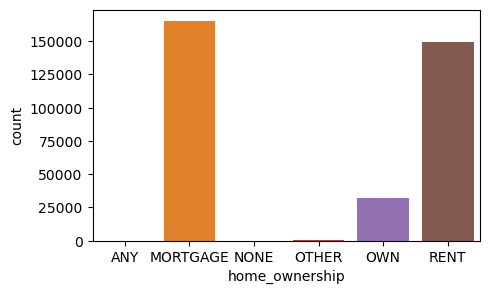

In [758]:
#home_ownership
categorical_uni('home_ownership')

### Insights:
>- Most customers have home ownership status as mortgage (48%) followed by rent at 43%.
>- Only 9% customers have home ownership as own.
>- All the other 3 categories does not even add up to 1% of all customers and can be irrelevant to our analysis

,0,1,2
Category,Not Verified,Source Verified,Verified
Percentage,33.212078,32.869929,33.917994


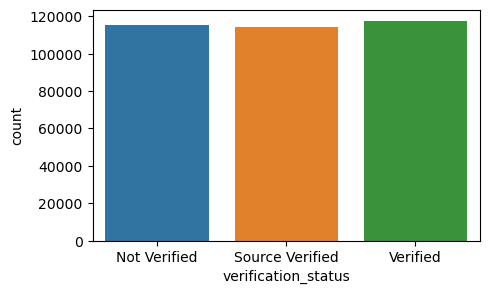

In [759]:
#verification_status
categorical_uni('verification_status')

### Insights:
>- All the 3 categories are surprisingly equally divided and show perfect balance

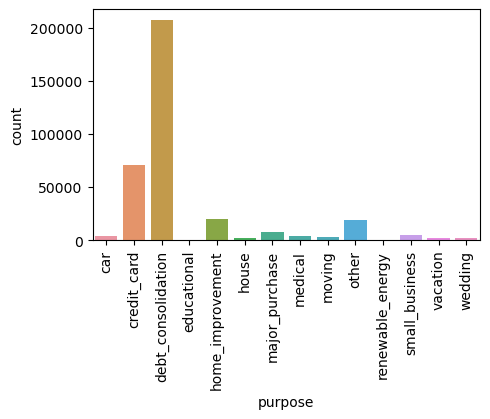

In [760]:
# purpose

plt.figure(figsize= [5,3])
sns.countplot(x = 'purpose', data = df,order = sorted(df['purpose'].unique()))
plt.xticks(rotation = 90)
plt.show()

### Insights:
>- Loans taken for debt_consolidation are disproportionately higher than all other purposes combined
>- Credit card is the second highest category for loan application purposes

,0,1
Category,0.000000,1.000000
Percentage,84.834474,15.165526


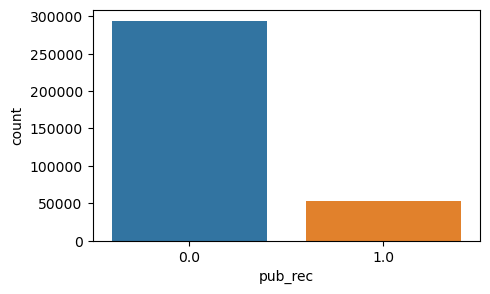

In [761]:
# pub_rec

categorical_uni('pub_rec')

### Insights:
>- 84% of borrowers have no derogatory public records which is a good sign for the Platform

,0,1
Category,f,w
Percentage,60.700728,39.299272


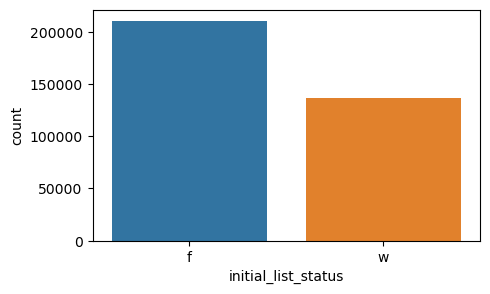

In [762]:
# initial_list_status

categorical_uni('initial_list_status')

### Insights:
>- 61% of customers have initial listing status f while 39% have status w

,0,1,2
Category,DIRECT_PAY,INDIVIDUAL,JOINT
Percentage,0.068891,99.825034,0.106075


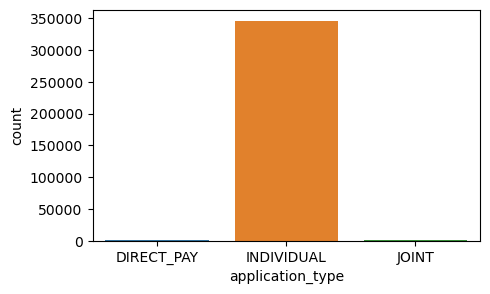

In [763]:
# application_type

categorical_uni('application_type')

### Insights:
>- 99.8 % of the customers are individuals and 0.1% customers are joint
>- This feature can be ignored from model building process as it will be of no consequence and can negatively impact model

In [764]:
# removing application_type from dataframe

df.drop('application_type', axis =1, inplace = True)

In [765]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

,0,1
Category,0.000000,1.000000
Percentage,43.728183,56.271817


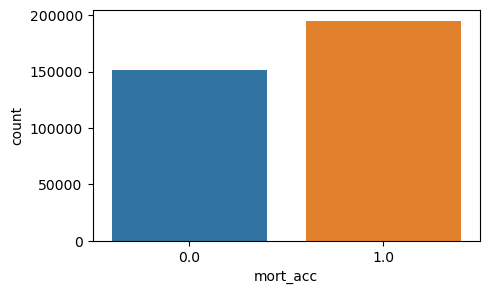

In [766]:
# mort_acc

categorical_uni('mort_acc')

### Insights:
>- 56% of customers have 1 or more mortgage accounts and 43% have no mortgage accounts

,0,1
Category,0.000000,1.000000
Percentage,87.954457,12.045543


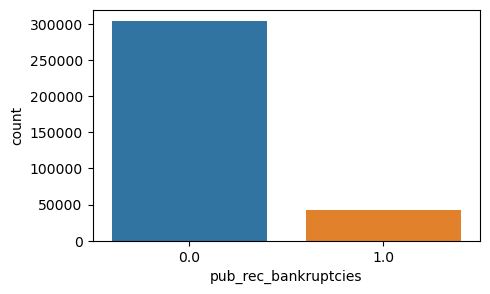

In [767]:
# pub_rec_bankruptcies

categorical_uni('pub_rec_bankruptcies')

### Insights:
>- 88% of customers have no record of public bankruptcies which is a good sign for the platform

,0,1,2,3,4,5,6,7,8,9,10,11
Category,1.000000,2.000000,3.000000,4.00000,5.000000,6.000000,7.000000,8.000000,9.00000,10.000000,11.000000,12.000000
Percentage,8.673344,7.167832,8.010665,8.36175,8.125964,7.690423,10.124378,8.291417,7.01679,10.664553,8.605606,7.267277


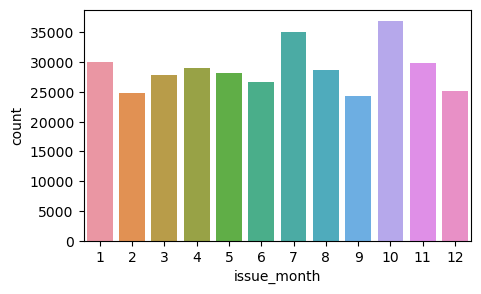

In [768]:
# issue_month

categorical_uni('issue_month')

### Insights:
>- All months show uniform distribution of loan issuing showing no specific impact

,0,1,2,3,4,5,6,7,8,9
Category,2007.000000,2008.00000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000
Percentage,0.001441,0.22858,0.976868,2.392448,4.493478,10.804353,25.036535,25.913382,23.297831,6.855084


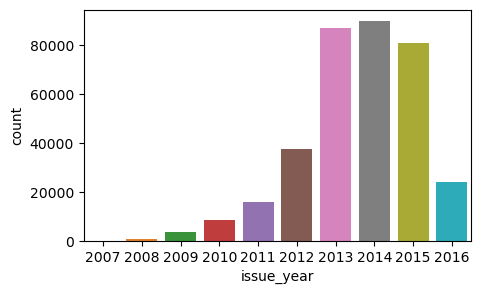

In [769]:
# issue_year

categorical_uni('issue_year')

### Insights:
>- Most loans have been issued after 2012 and mainly after 2013 until 2015.
>- 2016 saw a dip in number of loans extended

### Bivariate Analysis:
#### Initially we will be checking relation between all independent variables and target variable.

In [770]:
# Defining functions for bivariate analysis

#for comparing 2 numerical variables

def numerical_biv(x, y):
    plt.figure(figsize=[15,5])
    
    plt.subplot(1,2,1)
    plt.title('Scatter Plot')
    sns.scatterplot(x = x, y= y, data = df)

    plt.subplot(1,2,2)
    plt.title('Line Plot')
    sns.lineplot(x = x, y = y, data = df)
    corr = np.corrcoef(df[x], df[y])[0][1]
    plt.show()
    print("Pearson's Correlation factor: ", corr)

#for comparing 2 categorical variables

def categorical_biv(x,y):
    plt.figure(figsize= [15,5])

    plt.subplot(1,2,1)
    sns.boxplot(x = x, y = y, data = df)

    plt.subplot(1,2,2)
    sns.histplot(x = df[y], hue = df[x], bins = 20)
    
    # ANOVA test to check relationship
#     s = []
#     categories = df[x].unique()
#     for i in categories:
#         s1 = df.loc[df[x]==i][y]
#         s.append(s1)
     
#     test, p_val= f_oneway(*s)
#     print(f'p value for ANOVA test of relation between {x} and {y} is:', p_val)

    # 2-tailed T-Test to check relationship
    sample_size = df.groupby(x)[y].count().min()

    categories = df[x].unique()
    s1 = df.loc[df[x]==categories[0]][y].sample(sample_size)
    s2 = df.loc[df[x]==categories[1]][y].sample(sample_size)
    
    # conducting independent t test using scipy.stats library function
    test_stats, p_val = ttest_ind (s1,s2, equal_var=False)
    print(f'Null Hypothesis: Mean of {y} values for categories {categories[0]} and {categories[1]} is same')
    print(f'Alternate Hypothesis: Mean of values for categories {categories[0]} and {categories[1]} is not same')
    print()
    print('p value for two tailed T test is: ', p_val)
    print()
    if p_val<0.05:
        print(f'Mean of {y} and {x} are different for both categories therefore {y} has some relation with {x}')
    else:
        print(f'Mean of {y} and {x} are same for both categories therefore {y} has minimal or no impact on {x}')
    
    plt.show()
    
    print('INSIGHTS:')
    if np.mean(df.loc[df[x]==categories[0]][y])>np.mean(df.loc[df[x]==categories[1]][y]):
        print(f'Mean of {y} for {categories[0]} at {round(np.mean(df.loc[df[x]==categories[0]][y]),2)} is greater than that for {categories[1]} at {round(np.mean(df.loc[df[x]==categories[1]][y]),2)}')
    else:
        print(f'Mean of {y} for {categories[0]} at {round(np.mean(df.loc[df[x]==categories[0]][y]),2)} is lower than that for {categories[1]} at {round(np.mean(df.loc[df[x]==categories[1]][y]),2)}')
    print()
    if p_val<0.05:
        print(f'{y} and {x}  has some relation has been also seen through hypothesis testing and results shown above')
    else:
        print(f'{y} has minimal or no impact on {x} has been also seen through hypothesis testing and results shown above')
    return df.groupby(x)[y].describe()

# function to convert categorical columns into contingency tables 
# and return p value of chisquared test

def chi_squared(cat1, cat2):
    size_cat1 = df[cat1].nunique()
    size_cat2 = df[cat2].nunique()
    lst = []
    for i in range(size_cat1):
        lst.append(pd.crosstab(df[cat1], df[cat2]).reset_index().iloc[i, 1:size_cat2 + 1].to_list())
    
    from scipy.stats import chi2_contingency
    stat, p, dof, expected = chi2_contingency(lst)
    
    print('Null Hypothesis: Both the variables are independent of each other')
    print()
    print('Alternate Hypothesis: Both the variables are related and dependent on each other')
    print('p value for Chi Square test is:', p)
    print()
    if p<0.05:    
        print(f'It means {cat1} and {cat2} are related and dependent on each other')
    else:
        print(f'It means {cat1} and {cat2} are unrelated and independent of each other')
    return p

def both_categorical(x,y):
    pd.crosstab(df[x], df[y]).plot(kind='bar',figsize = [5,3])
    
    p_val = chi_squared(x, y)
    plt.show()    
    return pd.crosstab(df[x], df[y], margins= True)

Null Hypothesis: Mean of loan_amnt values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  1.4401159958164469e-242

Mean of loan_amnt and loan_status are different for both categories therefore loan_amnt has some relation with loan_status


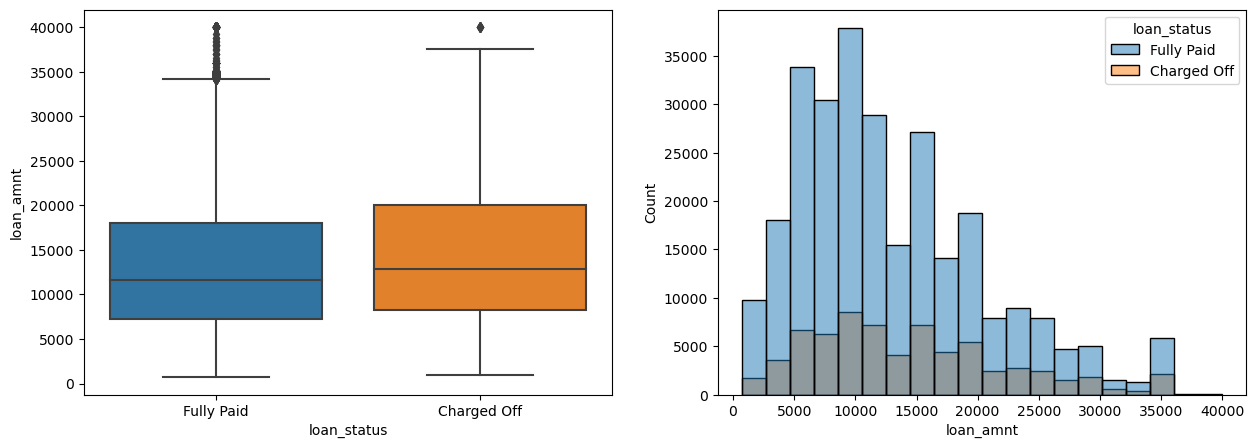

INSIGHTS:
Mean of loan_amnt for Fully Paid at 13035.37 is lower than that for Charged Off at 14441.22

loan_amnt and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,14441.220712,8021.119831,1000.0,8200.0,12900.0,20000.0,40000.0
Fully Paid,277785.0,13035.367640,7688.168747,725.0,7200.0,11575.0,17975.0,40000.0


In [771]:
# loan_amnt vs loan_status

temp = categorical_biv('loan_status','loan_amnt')
temp

### Insights:
>- Mean of loan amount for both categories are a little far with **Charged Off loans showing a higher mean of 14400 compared to 13000 for fully paid loans**.
>- Loan amount and loan status has some relation has been also seen through hypothesis testing and results shown above

Null Hypothesis: Mean of int_rate values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  0.0

Mean of int_rate and loan_status are different for both categories therefore int_rate has some relation with loan_status


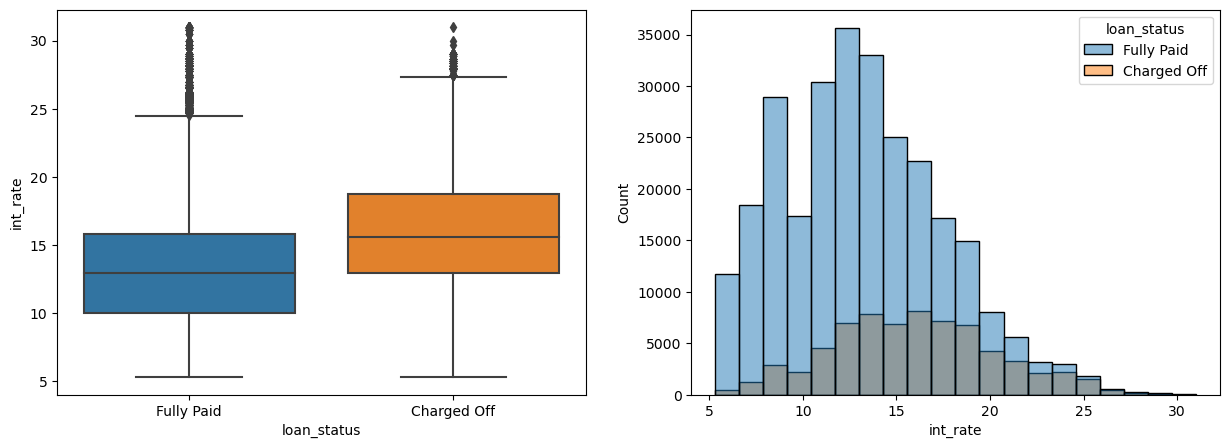

INSIGHTS:
Mean of int_rate for Fully Paid at 13.17 is lower than that for Charged Off at 15.94

int_rate and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,15.936509,4.354018,5.32,12.99,15.61,18.75,30.99
Fully Paid,277785.0,13.172969,4.290025,5.32,9.99,12.99,15.80,30.99


In [772]:
# int_rate vs loan_status

temp = categorical_biv('loan_status','int_rate')
temp

### Insights:
>- **Interest rates for charged off loans is much higher at 16% compared to 13% for fully paid loans**
>- Interest rates  and loan status has some relation has been also seen through hypothesis testing and results shown above

Null Hypothesis: Mean of installment values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  1.2237779888392205e-131

Mean of installment and loan_status are different for both categories therefore installment has some relation with loan_status


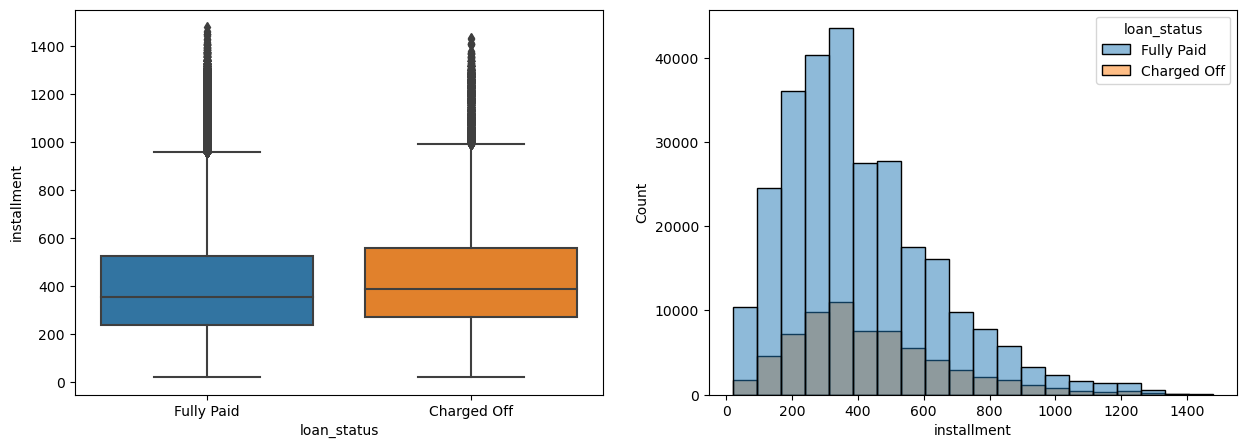

INSIGHTS:
Mean of installment for Fully Paid at 402.44 is lower than that for Charged Off at 433.19

installment and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,433.187659,233.093367,21.62,269.07,385.79,557.48,1435.28
Fully Paid,277785.0,402.438423,231.157891,19.87,235.24,351.94,523.75,1479.49


In [773]:
# installment vs loan_status

temp = categorical_biv('loan_status', 'installment')
temp

### Insights:
>- Mean of intallment amount for Charged off loans is 433 whereas that for Fully paid loans is 402.
>- Although amounts seem close but **hypothesis testing says they are different and installment amount seems to have some relation with loan status**

Null Hypothesis: Mean of annual_inc values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  0.0

Mean of annual_inc and loan_status are different for both categories therefore annual_inc has some relation with loan_status


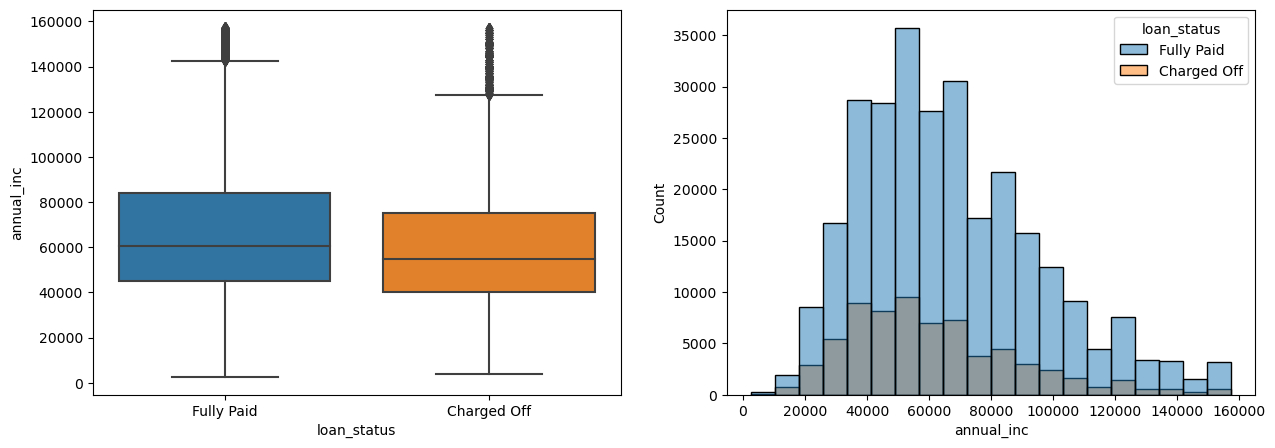

INSIGHTS:
Mean of annual_inc for Fully Paid at 66505.99 is greater than that for Charged Off at 60724.72

annual_inc and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,60724.720825,27270.506058,4000.0,40000.0,55000.0,75000.0,157124.0
Fully Paid,277785.0,66505.988661,28981.159382,2500.0,45000.0,60626.0,84000.0,157467.7


In [774]:
# annual_inc vs loan_status

temp = categorical_biv('loan_status', 'annual_inc')
temp

### Insights:
>- Mean of **annual income for Fully paid loans at 66500 is higher than that for Charged Off loans at 60000**.
>- **Annual Income and loan status** has some relation has been also seen through hypothesis testing and results shown above

Null Hypothesis: Mean of dti values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  0.0

Mean of dti and loan_status are different for both categories therefore dti has some relation with loan_status


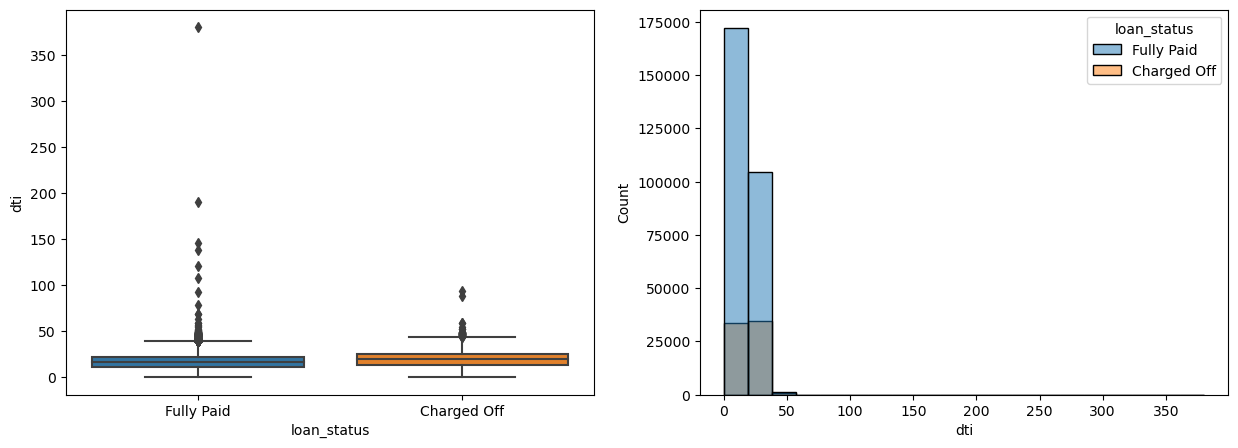

INSIGHTS:
Mean of dti for Fully Paid at 16.85 is lower than that for Charged Off at 19.51

dti and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,19.505537,8.326066,0.0,13.37,19.32,25.46,93.86
Fully Paid,277785.0,16.850336,7.968673,0.0,10.95,16.38,22.28,380.53


In [775]:
# dti vs loan_status

categorical_biv('loan_status', 'dti')

### Insights:
>- Mean of **debt to income ratio for Charged off loans is higher at 19 compared to Fully paid loans at 16.**
>- dti and loan status has some relation has been also seen through hypothesis testing and results shown above

Null Hypothesis: Mean of open_acc values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  1.4616624266670257e-55

Mean of open_acc and loan_status are different for both categories therefore open_acc has some relation with loan_status


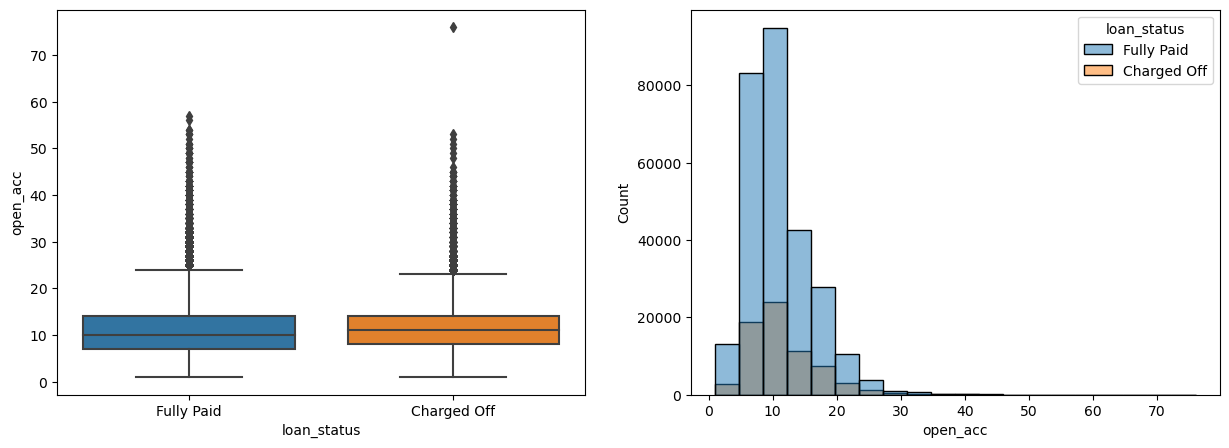

INSIGHTS:
Mean of open_acc for Fully Paid at 10.96 is lower than that for Charged Off at 11.36

open_acc and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,11.357680,5.119855,1.0,8.0,11.0,14.0,76.0
Fully Paid,277785.0,10.956304,4.937091,1.0,7.0,10.0,14.0,57.0


In [776]:
# open_acc vs loan_status

categorical_biv('loan_status', 'open_acc')

### Insights:
>- Mean of **number of open credit lines for Charged off loans is higher at 11.35 compared to Fully paid loans ar 11**
>- Number of open credit lines and loan status has some relation has been also seen through hypothesis testing and results shown above

Null Hypothesis: Mean of revol_bal values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  4.675258833314991e-06

Mean of revol_bal and loan_status are different for both categories therefore revol_bal has some relation with loan_status


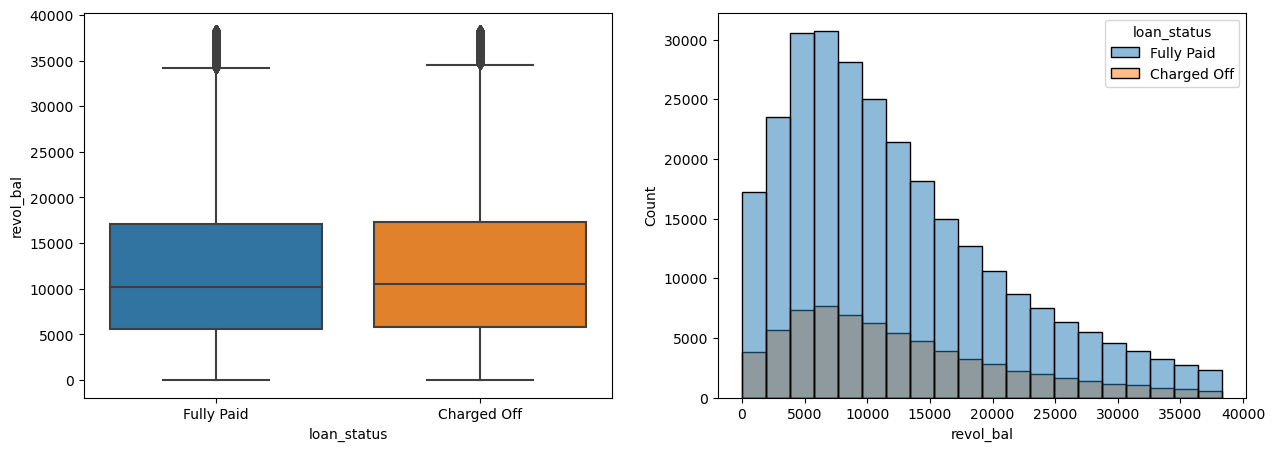

INSIGHTS:
Mean of revol_bal for Fully Paid at 12229.26 is lower than that for Charged Off at 12453.62

revol_bal and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,12453.620451,8565.416994,0.0,5859.0,10517.5,17342.25,38336.0
Fully Paid,277785.0,12229.259038,8583.126539,0.0,5639.0,10224.0,17066.00,38336.0


In [777]:
# revol_bal vs loan_status

temp = categorical_biv('loan_status', 'revol_bal')
temp

Null Hypothesis: Mean of revol_util values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  0.0

Mean of revol_util and loan_status are different for both categories therefore revol_util has some relation with loan_status


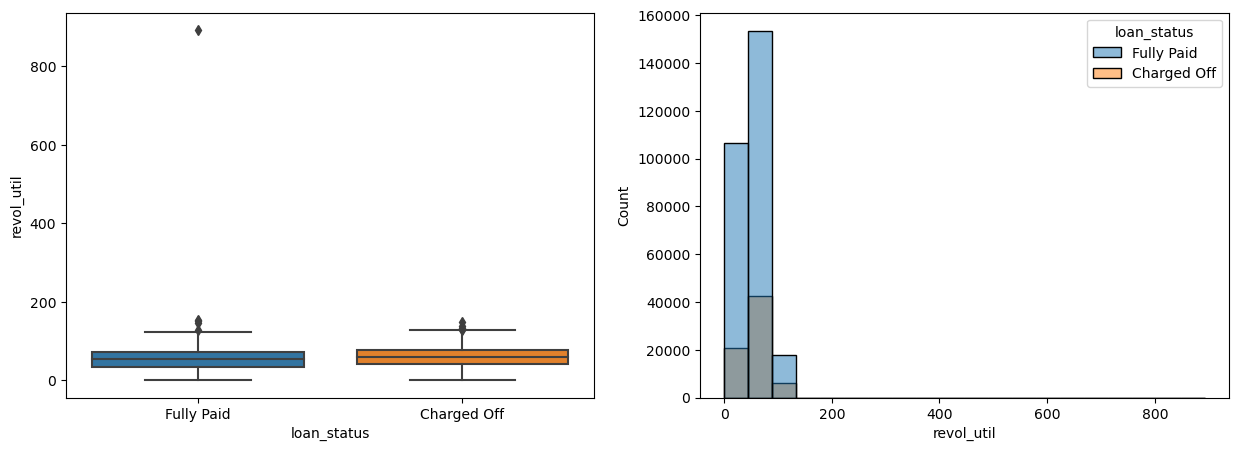

INSIGHTS:
Mean of revol_util for Fully Paid at 52.22 is lower than that for Charged Off at 57.33

revol_util and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,57.332965,23.383676,0.0,40.7,58.6,75.5,148.0
Fully Paid,277785.0,52.216138,24.416619,0.0,34.1,52.9,71.1,892.3


In [778]:
# revol_util vs loan_status

temp = categorical_biv('loan_status', 'revol_util')
temp

>- Revolving line utilization for charged off loans is expectedly higher

Null Hypothesis: Mean of total_acc values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  5.818878140196472e-16

Mean of total_acc and loan_status are different for both categories therefore total_acc has some relation with loan_status


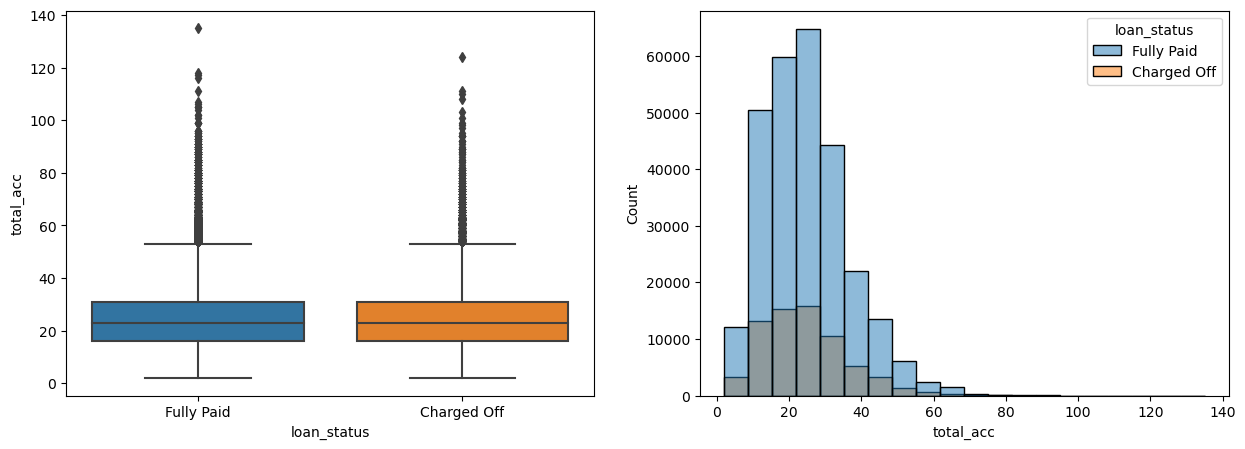

INSIGHTS:
Mean of total_acc for Fully Paid at 24.73 is greater than that for Charged Off at 24.32

total_acc and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,24.316213,11.629652,2.0,16.0,23.0,31.0,124.0
Fully Paid,277785.0,24.731213,11.599817,2.0,16.0,23.0,31.0,135.0


In [779]:
# total_acc vs loan_status

temp = categorical_biv('loan_status', 'total_acc')
temp

>- Mean of total open credit lines is almost same for both categories of loans but hypothesis testing says means are different and open credit lines has some relation with target variable

Null Hypothesis: Mean of issue_earliest_datediff values for categories Fully Paid and Charged Off is same
Alternate Hypothesis: Mean of values for categories Fully Paid and Charged Off is not same

p value for two tailed T test is:  1.6553190481038756e-43

Mean of issue_earliest_datediff and loan_status are different for both categories therefore issue_earliest_datediff has some relation with loan_status


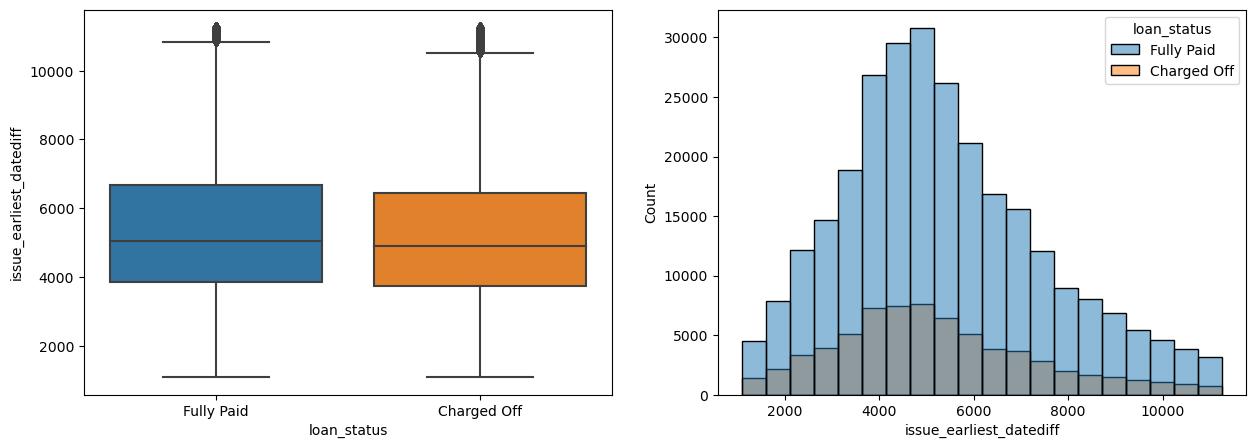

INSIGHTS:
Mean of issue_earliest_datediff for Fully Paid at 5355.09 is greater than that for Charged Off at 5205.82

issue_earliest_datediff and loan_status  has some relation has been also seen through hypothesis testing and results shown above


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,69140.0,5205.824342,2125.994751,1095.0,3744.0,4901.0,6452.0,11264.0
Fully Paid,277785.0,5355.090257,2135.818941,1095.0,3866.0,5052.0,6664.0,11264.0


In [780]:
# issue_earliest_datediff vs loan_status

temp = categorical_biv('loan_status', 'issue_earliest_datediff')
temp

>- Customers with longer history (higher mean issue date to first credit history difference) have Fully paid loans compared to customers with charged off loans

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means loan_status and term are related and dependent on each other


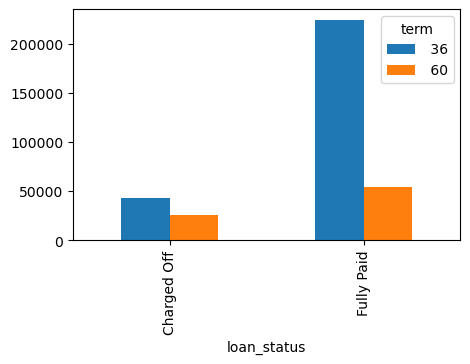

term,36,60,All
loan_status,,,
Charged Off,42840,26300,69140
Fully Paid,223755,54030,277785
All,266595,80330,346925


In [781]:
# term vs loan_status

temp = both_categorical('loan_status','term')
temp

>- Most Fully paid loans have lower term of 36 months 
>- In charged off loans, loans with 36 month term are more than 60 month loans

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means loan_status and grade are related and dependent on each other


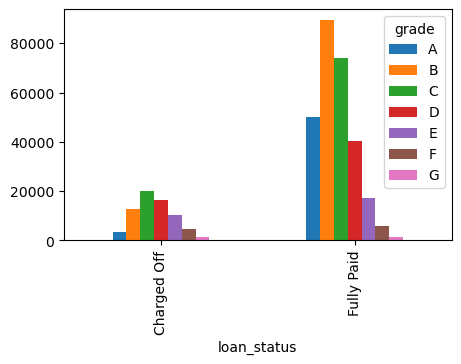

grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
Charged Off,3381,12902,20124,16474,10457,4496,1306,69140
Fully Paid,50126,89233,73845,40143,17181,5914,1343,277785
All,53507,102135,93969,56617,27638,10410,2649,346925


In [782]:
# grade vs loan_status

temp = both_categorical('loan_status', 'grade')
temp

>- Most Charged off loans are of category C and D 
>- Most Fully paid loans are of category B and C.

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 3.4076049241926377e-72

It means loan_status and emp_length are related and dependent on each other


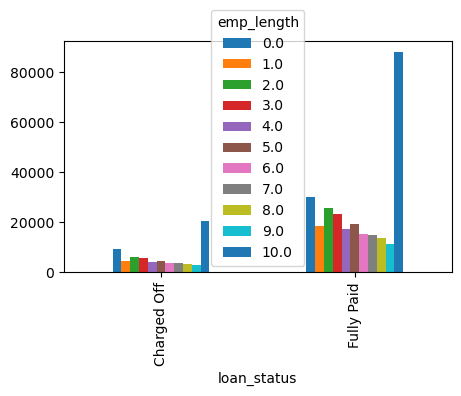

emp_length,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
loan_status,,,,,,,,,,,,
Charged Off,9206,4671,6291,5754,4174,4658,3636,3682,3464,2906,20698,69140
Fully Paid,30231,18619,25873,23194,17351,19287,15306,15073,13603,11241,88007,277785
All,39437,23290,32164,28948,21525,23945,18942,18755,17067,14147,108705,346925


In [783]:
# emp_length vs loan_status

temp = both_categorical('loan_status','emp_length')
temp

>- As most customers have employment length of 10 or more years, data is a bit skewed
>- Many customers with Fully paid loans have employment length of less than 1 year too
>- Although same pattern is followed by customers with Charged off loans. 

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 1.4091096527330937e-301

It means loan_status and home_ownership are related and dependent on each other


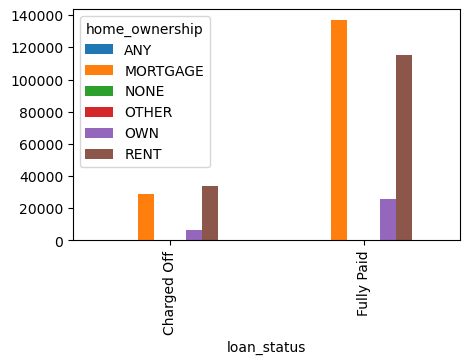

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,All
loan_status,,,,,,,
Charged Off,0,28663,5,15,6728,33729,69140
Fully Paid,3,136772,19,84,25640,115267,277785
All,3,165435,24,99,32368,148996,346925


In [784]:
# home_ownership vs loan_status

temp = both_categorical('loan_status', 'home_ownership')
temp

>- **Customers with Charged off loans have greater share of Rental home ownership**
>- Customers with Fully paid loans highest share of Mortgage type home ownership

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means loan_status and verification_status are related and dependent on each other


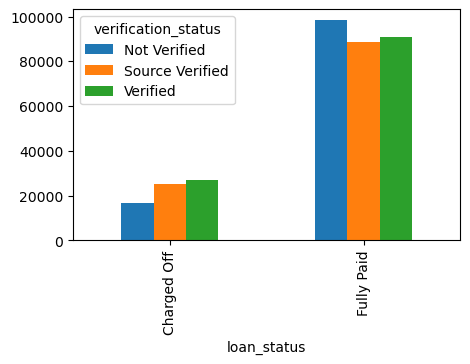

verification_status,Not Verified,Source Verified,Verified,All
loan_status,,,,
Charged Off,16909,25259,26972,69140
Fully Paid,98312,88775,90698,277785
All,115221,114034,117670,346925


In [785]:
# verification_status vs loan_status

temp = both_categorical('loan_status', 'verification_status')
temp

>- Surprising that **verified loans are highest in charged off loans compared to others**
>- **Unverified loans are highest in Fully paid loans compared to others.**

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 4.867074194736171e-239

It means loan_status and purpose are related and dependent on each other


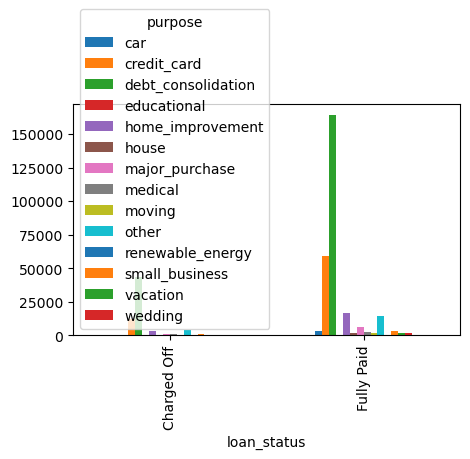

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,All
loan_status,,,,,,,,,,,,,,,
Charged Off,579,12154,43618,35,3476,395,1313,801,618,4057,72,1398,423,201,69140
Fully Paid,3636,59148,163905,191,16463,1524,6474,2879,1975,14731,220,3363,1802,1474,277785
All,4215,71302,207523,226,19939,1919,7787,3680,2593,18788,292,4761,2225,1675,346925


In [786]:
# purpose vs loan_status

temp = both_categorical('loan_status', 'purpose')
temp

>- Credit card and debt consolidation contribute the highest in both fully paid and charged off loans followed by home improvement

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 3.731628857833032e-20

It means loan_status and pub_rec are related and dependent on each other


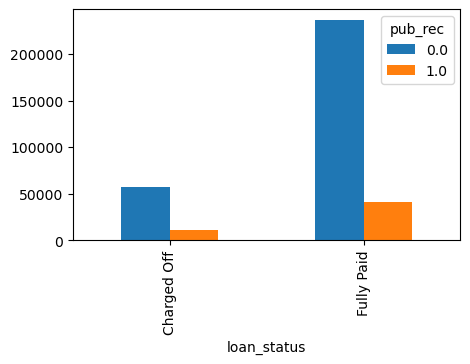

pub_rec,0.0,1.0,All
loan_status,,,
Charged Off,57878,11262,69140
Fully Paid,236434,41351,277785
All,294312,52613,346925


In [787]:
# pub_rec vs loan_status

temp = both_categorical('loan_status', 'pub_rec')
temp

>- Most customers for both category of loans have 0 number of public derogatory records
>- Ratio of customers with more than 1 derogatory records to 0 records is almost same for charged off and fully paid loans

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 6.853398482330582e-10

It means loan_status and initial_list_status are related and dependent on each other


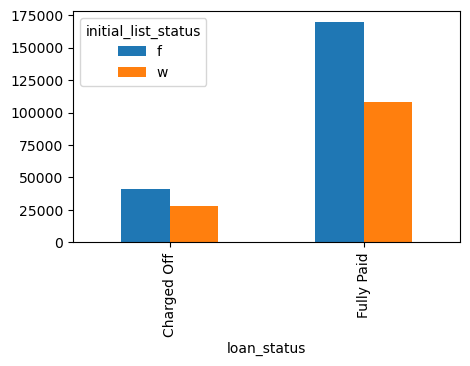

initial_list_status,f,w,All
loan_status,,,
Charged Off,41259,27881,69140
Fully Paid,169327,108458,277785
All,210586,136339,346925


In [788]:
# initial_list_status vs loan_status

temp = both_categorical('loan_status', 'initial_list_status')
temp

>- No specific pattern observed visually but chi square test concludes that they are related to each other

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 1.8780019597289331e-264

It means loan_status and mort_acc are related and dependent on each other


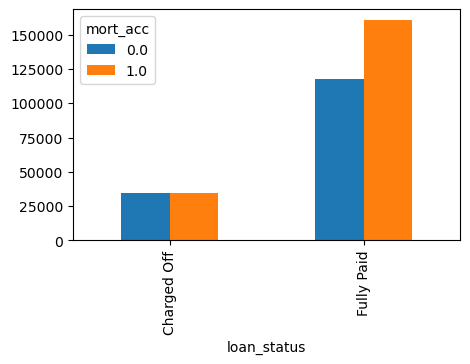

mort_acc,0.0,1.0,All
loan_status,,,
Charged Off,34289,34851,69140
Fully Paid,117415,160370,277785
All,151704,195221,346925


In [789]:
# mort_acc vs loan_status

temp = both_categorical('loan_status', 'mort_acc')
temp

>- Among Charged off loan customers, both categories of 0 and 1 or more mortgage accounts seen equally.
>- Among Fully paid loan customers, higher number of customers with 1 or more mortgage accounts present

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 7.943561224123612e-05

It means loan_status and pub_rec_bankruptcies are related and dependent on each other


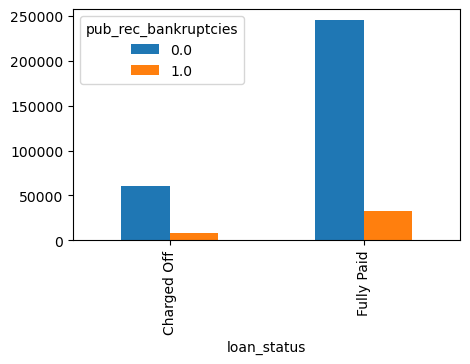

pub_rec_bankruptcies,0.0,1.0,All
loan_status,,,
Charged Off,60509,8631,69140
Fully Paid,244627,33158,277785
All,305136,41789,346925


In [790]:
# pub_rec_bankruptcies vs loan_status

temp = both_categorical('loan_status', 'pub_rec_bankruptcies')
temp

>- Majority of customers in dataset have no public record of bankruptcies and that is reflected in loan status categories as well
>- No difference in ratio of customers with 0 and 1 or more public records seen for both CHarged off and Fully paid customers

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 4.204478037565137e-36

It means loan_status and issue_month are related and dependent on each other


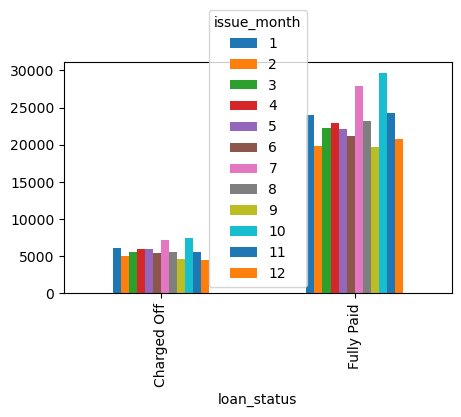

issue_month,1,2,3,4,5,6,7,8,9,10,11,12,All
loan_status,,,,,,,,,,,,,
Charged Off,6100,5084,5605,6041,6012,5463,7211,5518,4617,7409,5624,4456,69140
Fully Paid,23990,19783,22186,22968,22179,21217,27913,23247,19726,29589,24231,20756,277785
All,30090,24867,27791,29009,28191,26680,35124,28765,24343,36998,29855,25212,346925


In [791]:
# issue_month vs loan_status

temp = both_categorical('loan_status', 'issue_month')
temp

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means loan_status and issue_year are related and dependent on each other


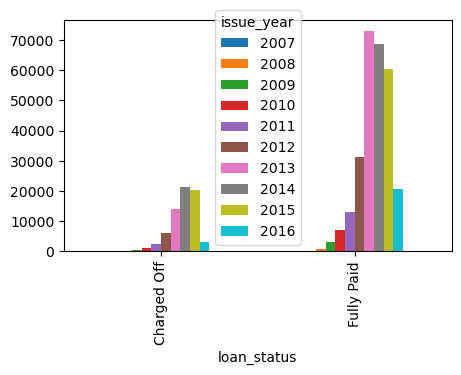

issue_year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
loan_status,,,,,,,,,,,
Charged Off,2,115,415,1099,2424,6236,13996,21231,20479,3143,69140
Fully Paid,3,678,2974,7201,13165,31247,72862,68669,60347,20639,277785
All,5,793,3389,8300,15589,37483,86858,89900,80826,23782,346925


In [792]:
# issue_year vs loan_status

temp = both_categorical('loan_status', 'issue_year')
temp

>- Most charged off loans were issued in 2014
>- Most fully paid loans were issued in 2013

### Insights:
>- **All the features were found to be related with target variable and same was tested with hypothesis testing**
#### Now we will be comparing a few independent features with each other to see if any feature is deeply correlated. If yes, we may keep only one out of two features

Text(0.5, 1.0, 'Cells with correlation > 0.6')

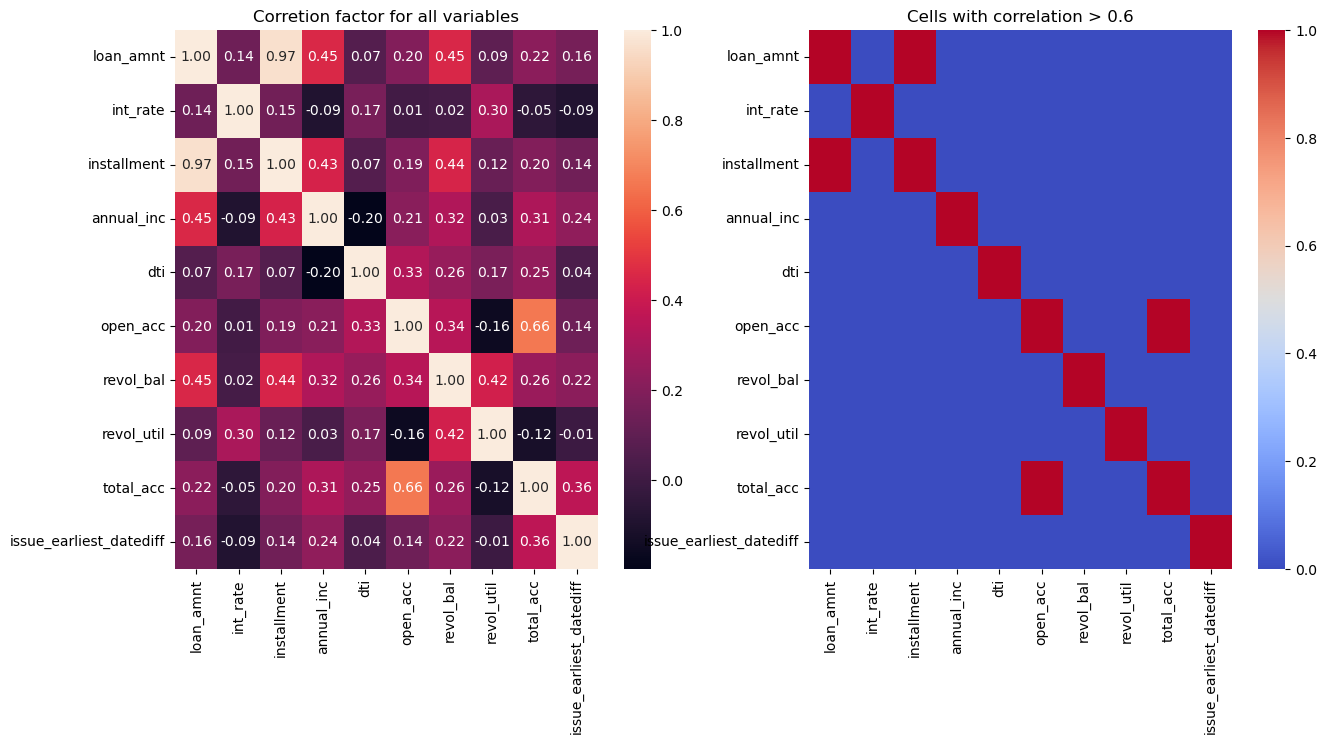

In [793]:
# comparing numerical features using correlation and heatmap

plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.heatmap(df.corr(method= 'spearman'), annot= True, fmt = '.2f')
plt.title('Corretion factor for all variables')

plt.subplot(1,2,2)
sns.heatmap(df.corr(method= 'spearman')>0.6, cmap = 'coolwarm')
plt.title('Cells with correlation > 0.6')

### Insights:
>- Most numerical features do not show correlation with each other
>- **Loan amount and installment amount have a very high positive correlation of 0.97**
>- Logically installment amount is directly proportional to loan amount and that is reflected by heatmap too.
>- **Thus one out of these two variables can be removed before model building**
>- **We will keep only loan amount and drop installment amount from dataset.**
>- Total number of credit lines and number of open credit lines also show positive correlation of 0.67 as expected.
>- **We can check the impact of total_acc and open_acc later while building model with VIF and pvalue**


In [794]:
# dropping installment amount

df.drop('installment', axis =1, inplace = True)

In [795]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means sub_grade and grade are related and dependent on each other


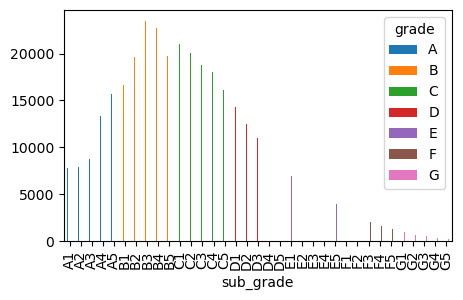

In [796]:
# grade vs sub_grade

temp = both_categorical('sub_grade', 'grade')

### Insights:
>- As seen from hypothesis testing, sub_grade is very much related to grade and it makes logical sense too
>- We can keep both features for now as deleting one can lead to loss of granular data and its impact

In [797]:
def categorical_biv(x,y):
    plt.figure(figsize= [15,5])

    plt.subplot(1,2,1)
    sns.boxplot(x = x, y = y, data = df)

    plt.subplot(1,2,2)
    sns.histplot(x = df[y], hue = df[x], bins = 20)
    
    # ANOVA test to check relationship
    s = []
    categories = df[x].unique()
    for i in categories:
        s1 = df.loc[df[x]==i][y]
        s.append(s1)
     
    test, p_val= f_oneway(*s)
    print(f'p value for ANOVA test of relation between {x} and {y} is:', p_val)
    
    plt.show()
    
    print('INSIGHTS:')

    if p_val<0.05:
        print(f'{y} and {x}  has some relation has been also seen through hypothesis testing and results shown above')
    else:
        print(f'{y} has minimal or no impact on {x} has been also seen through hypothesis testing and results shown above')
    return df.groupby(x)[y].describe()


p value for ANOVA test of relation between emp_length and annual_inc is: 0.0


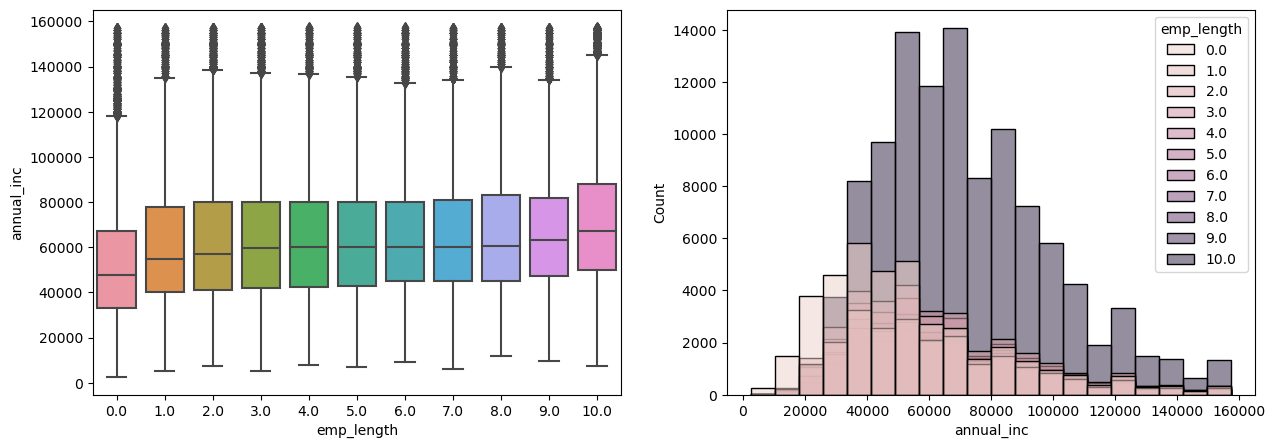

INSIGHTS:
annual_inc and emp_length  has some relation has been also seen through hypothesis testing and results shown above


In [798]:
# emp_length vs 'annual_inc'

temp = categorical_biv('emp_length', 'annual_inc')


>- As expected, median salary increases as employment length increases. 

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means pub_rec and pub_rec_bankruptcies are related and dependent on each other


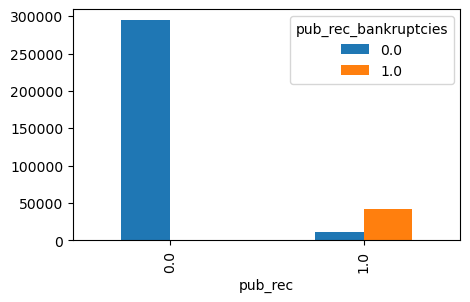

pub_rec_bankruptcies,0.0,1.0,All
pub_rec,,,
0.0,294312,0,294312
1.0,10824,41789,52613
All,305136,41789,346925


In [799]:
# pub_rec vs pub_rec_bankruptcies

temp = both_categorical('pub_rec', 'pub_rec_bankruptcies')
temp

### Insights:
>- Customers with 0 public derogatory records have no public record bankruptcies too. This shows good behaviour and character across different aspects
>- Public record and public record bankruptcies are seen to be related to each other
>- Therefore **we can drop pub_rec from data set as both show high correlation**.

In [800]:
# dropping public derogatory remarks or pub_rec

df.drop('pub_rec', axis = 1, inplace = True)

In [801]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

Null Hypothesis: Both the variables are independent of each other

Alternate Hypothesis: Both the variables are related and dependent on each other
p value for Chi Square test is: 0.0

It means home_ownership and mort_acc are related and dependent on each other


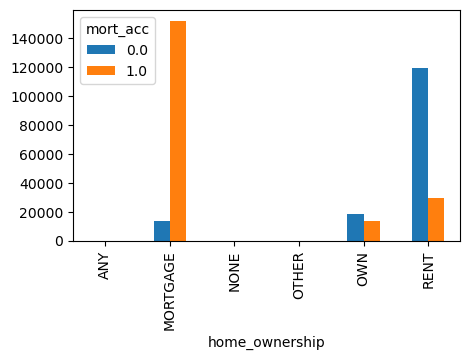

mort_acc,0.0,1.0,All
home_ownership,,,
ANY,0,3,3
MORTGAGE,13469,151966,165435
NONE,8,16,24
OTHER,82,17,99
OWN,18458,13910,32368
RENT,119687,29309,148996
All,151704,195221,346925


In [802]:
# home_ownership vs mort_acc

temp = both_categorical('home_ownership', 'mort_acc')
temp

### Insights:
>- As expected **there is high correlation between home_ownership and mortgage account number**
>- Most customers with mortgage as home ownership category have mort_account value as 1 naturally.
>- As both features convey same meaning, **we can drop mort_account from dataset for model building**

In [803]:
# dropping mort_account from dataset

df.drop('mort_acc', axis = 1, inplace = True)

In [804]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

In [805]:
#list of current features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346925 entries, 0 to 359748
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                346925 non-null  float64
 1   term                     346925 non-null  object 
 2   int_rate                 346925 non-null  float64
 3   grade                    346925 non-null  object 
 4   sub_grade                346925 non-null  object 
 5   emp_length               346925 non-null  object 
 6   home_ownership           346925 non-null  object 
 7   annual_inc               346925 non-null  float64
 8   verification_status      346925 non-null  object 
 9   loan_status              346925 non-null  object 
 10  purpose                  346925 non-null  object 
 11  dti                      346925 non-null  float64
 12  open_acc                 346925 non-null  float64
 13  revol_bal                346925 non-null  float64
 14  revo

#### Basic EDA completed and some features were dropped. Totally 20 independent features are present currently for model building process

_____

## 2. Data Preprocessing:

In [806]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,pub_rec_bankruptcies,issue_earliest_datediff,issue_month,issue_year
0,10000.0,36,11.44,B,B4,10.0,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,36369.0,41.8,25.0,w,0.0,8980,1,2015
1,8000.0,36,11.99,B,B5,4.0,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,f,0.0,3836,1,2015
2,15600.0,36,10.49,B,B3,0.0,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,11987.0,92.2,26.0,f,0.0,2710,1,2015
3,7200.0,36,6.49,A,A2,6.0,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,5472.0,21.5,13.0,f,0.0,2983,11,2014
4,24375.0,60,17.27,C,C5,9.0,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,24584.0,69.8,43.0,f,0.0,5145,4,2013


In [807]:
# changing values of target variable from string to binary
# 1- Charged off and 0- fully paid

df['loan_status'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [808]:
# converting term and emp_length to integer to prepare for scaling

df['term'] = df['term'].astype('int')
df['emp_length'] = df['emp_length'].astype('int')

In [809]:
# storing numerical and categorical columns in lists separately

num_cols = df.select_dtypes(include = np.number).columns
cat_cols = df.select_dtypes(include = 'object').columns

In [810]:
cat_cols

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'pub_rec_bankruptcies', 'issue_month',
       'issue_year'],
      dtype='object')

#### Target encoding for categorical variables

In [811]:
# Using Label Encoding to replace string values in Categorical columns

encoder = LabelEncoder()
for x in cat_cols:
    df[x] = encoder.fit_transform(df[x])


In [812]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,pub_rec_bankruptcies,issue_earliest_datediff,issue_month,issue_year
0,10000.0,36,11.44,1,8,10,5,117000.0,0,0,12,26.24,16.0,36369.0,41.8,25.0,1,0,8980,0,8
1,8000.0,36,11.99,1,9,4,1,65000.0,0,0,2,22.05,17.0,20131.0,53.3,27.0,0,0,3836,0,8
2,15600.0,36,10.49,1,7,0,5,43057.0,1,0,1,12.79,13.0,11987.0,92.2,26.0,0,0,2710,0,8
3,7200.0,36,6.49,0,1,6,5,54000.0,0,0,1,2.60,6.0,5472.0,21.5,13.0,0,0,2983,10,7
4,24375.0,60,17.27,2,14,9,1,55000.0,2,1,1,33.95,13.0,24584.0,69.8,43.0,0,0,5145,3,6


In [813]:
df.reset_index(drop= True, inplace= True)

#### Checking VIF Score for data to check for multicollinearity

In [814]:
# Separating independent and dependent variables in X and y respectively

X = df.drop('loan_status', axis = 1)
y = df['loan_status']

In [815]:
# Creating table with feature names and respective VIF scores

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,sub_grade,142.03
2,int_rate,128.84
3,grade,64.50
1,term,23.03
19,issue_year,22.47
11,open_acc,12.61
14,total_acc,11.79
7,annual_inc,9.91
13,revol_util,9.01
17,issue_earliest_datediff,8.94


### Insights:
>- There is high multicollinearity in features as VIF value of greater than 10 is usually not acceptable
>- p-value obtained through statsmodel needs to be checked to affirm the findings

#### Standard scaling of numerical columns

In [816]:
# creating training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 1)

In [817]:
X_train.reset_index(drop= True, inplace = True)

In [818]:
X_test.reset_index(drop= True, inplace = True)

In [819]:
y_train.reset_index(drop = True, inplace = True)

In [820]:
y_test.reset_index(drop = True, inplace = True)

In [821]:
#using Standard scaling to scale numerical data

sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)

In [822]:
X_test = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

#### Data Pre-processing completed as all the variables were encoded or scaled and train-test split was done

___

## 3. Model Building:

In [823]:
# Building Logistic Regression model using statsmodel api

X_sm = sm.add_constant(X_train)
mod = sm.GLM(y_train,X_sm).fit()

In [824]:
## Here you go the P values for each variable(coefficient)
print(mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:               242847
Model:                            GLM   Df Residuals:                   242826
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                         0.14520
Method:                          IRLS   Log-Likelihood:            -1.1027e+05
Date:                Sun, 11 Dec 2022   Deviance:                       35257.
Time:                        17:01:57   Pearson chi2:                 3.53e+04
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09436
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Insights:
>- **p-value for grade was above 0.05 which means it can be dropped for model building process**

In [825]:
X_sm.drop('grade', inplace = True, axis = 1)
X_sm.drop('pub_rec_bankruptcies', axis = 1, inplace = True)

In [826]:
# checking p values again after dropping grade from dataset

mod = sm.GLM(y_train,X_sm).fit()
print(mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:               242847
Model:                            GLM   Df Residuals:                   242828
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.14520
Method:                          IRLS   Log-Likelihood:            -1.1027e+05
Date:                Sun, 11 Dec 2022   Deviance:                       35258.
Time:                        17:01:58   Pearson chi2:                 3.53e+04
No. Iterations:                     3   Pseudo R-squ. (CS):            0.09434
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [827]:
# dropping grade from test data too

X_train.drop(['grade', 'pub_rec_bankruptcies'], axis = 1, inplace = True)
X_test.drop(['grade', 'pub_rec_bankruptcies'], axis =1, inplace = True)

### We will be building model using Gridsearch cross validation by tuning hyperparameters lamda (C)

In [636]:
## creating ross validation folds 

folds = KFold(n_splits=5,shuffle=True, random_state=1 )

In [637]:
## parameter grid for C and Penality 
hyper_params = [{'C': [0.001,0.01, 0.1, 0.5, 1,10]}]

In [638]:
model = LogisticRegression(solver = 'saga')

In [404]:
## Grid searcch on parameters 
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(solver='saga'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.5, 1, 10]}],
             return_train_score=True, verbose=1)

In [405]:
## best prameter as per Grid search 
model_cv.best_estimator_

LogisticRegression(C=0.5, solver='saga')

### Insights:
>- After cross validation by varying value of penalization (lambda), **best result was found with value of C = 0.5** or lambda = 1/C
>- We will further do hyperparameter tuning for lambda to find a more accurate value

In [424]:
## parameter grid for C and Penality 
hyper_params = [{'C': np.linspace(0.3,0.8,11)}]

In [425]:
model = LogisticRegression(solver = 'saga')

In [426]:
## Grid searcch on parameters 
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(solver='saga'),
             param_grid=[{'C': array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ])}],
             return_train_score=True, verbose=1)

In [427]:
## best prameter as per Grid search 
model_cv.best_estimator_

LogisticRegression(C=0.6000000000000001, solver='saga')

>- **Finally value of C = 0.6 was found to show best result for our model**.

In [828]:
# Building Logistic Regression model with C=0.5

lr = LogisticRegression(C= 0.6)
lr.fit(X_train, y_train)

LogisticRegression(C=0.6)

In [829]:
#calculating coefficients generated by model

coef = lr.coef_
coef = coef.flatten()
pd.DataFrame({'Column':X_train.columns ,'Coefficient value':coef})

,Column,Coefficient value
0,loan_amnt,0.141297
1,term,0.171261
2,int_rate,-0.261121
3,sub_grade,0.690645
4,emp_length,-0.029790
5,home_ownership,0.117552
6,annual_inc,-0.228938
7,verification_status,0.044102
8,purpose,0.034343
9,dti,0.167900


In [830]:
#finding odds ratio for each feature

odds_ratio = np.exp(coef)
pd.DataFrame({'Column':X_train.columns ,'Odds Ratio':odds_ratio}).sort_values('Odds Ratio', ascending = False).reset_index(drop= True)

,Column,Odds Ratio
0,sub_grade,1.995002
1,term,1.186800
2,dti,1.182818
3,open_acc,1.158209
4,loan_amnt,1.151767
5,revol_util,1.146259
6,home_ownership,1.124740
7,issue_year,1.081808
8,verification_status,1.045089
9,purpose,1.034939


### Insights:
>- **Sub grade shows the most weightage in determining loan being charged off or fully paid**.
>- This is **followed by term and dti.**
>- Interest rate and annual income have a low weightage in determining the loan status which is surprising

## 4. Results Evaluation:

In [831]:
#calculating predictor variables

y_pred = lr.predict(X_test)

In [832]:
# calculating accuracy of the model

accuracy_score(y_test, y_pred)

0.8032245046983992

>- **Accuracy score is high for the model at 0.8**

In [833]:
# calculating precision score

precision_score(y_test, y_pred)

0.5375821663332381

In [834]:
# Calculating recall score

recall_score(y_test, y_pred)

0.09068119365569108

In [835]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     83335
           1       0.54      0.09      0.16     20743

    accuracy                           0.80    104078
   macro avg       0.68      0.54      0.52    104078
weighted avg       0.76      0.80      0.74    104078



In [836]:
# F-beta score with beta = 0.5 to give greater importance to precision

fbeta_score(y_test, y_pred, beta= 0.5)

0.2707331817265897

### Insights from classification report:
>- **Model shows a good accuracy score of 0.8**
>- **Both precision and recall scores for the model are low at 0.53 and0.01 respectively**
>- The f1 score which is harmonic mean of precision and recall scores is also low at 0.16
>- As our business case requires more precision than recall, we calculated f-beta score with beta = 0.5. Even **F-0.5 score was low for our model at 0.27**

<Figure size 400x300 with 0 Axes>

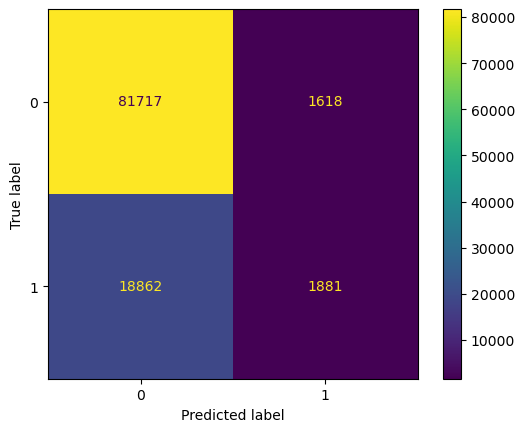

In [840]:
# printing confusion matrix for the model

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()

### Insights:
>- As reflected in classification report, model has generated lot of False positives as well as false negatives
>- TPR and FPR can be calculated from the above confusion matrix as shown below

In [841]:
tpr = 1881/(1881 + 1618)
fpr = 1618/(81717 + 1618)
tnr = 81717/(81717 + 1618)
fnr = 18862/(18862 + 1881)
print('True Positive Rate:', tpr)
print('False Positive Rate:', fpr)
print('True Negative Rate:', tnr)
print('False Negative Rate:', fnr)

True Positive Rate: 0.5375821663332381
False Positive Rate: 0.019415611687766246
True Negative Rate: 0.9805843883122337
False Negative Rate: 0.909318806344309


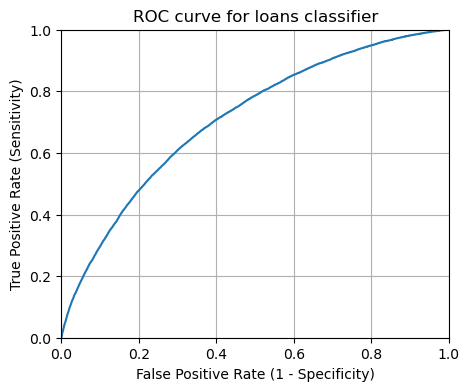

In [847]:
# Plotting the ROC curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize= [5,4])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for loans classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [848]:
# Calculating ROC- AUC Score
roc_auc_score(y_test, y_pred_prob)

0.7107711029986119

### Insights from ROC Curve:
>- The ROC curve represents the performance of model for different thresholds of probabilities
>- True positive rate (sensitivity) is plotted against false positive rate(specificity) to obtain the curve
>- The area under ROC curve is another measure of efficacy of our model in classifying the loans. 
>- **Value of 0.71 for AU-ROC can be considered as good performance for our model** considering other measures being low
>- An ideal model has an AU-ROC value of 1 and our model scored 0.71
>- This score being independent of threshold value of probability between 2 classes, it is more robust and a better measure of our model's performance

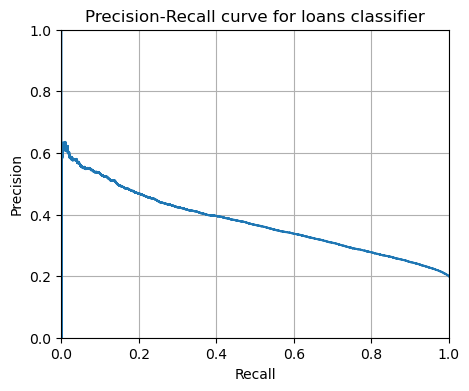

In [853]:
#plotting the precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize= [5,4])
plt.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision-Recall curve for loans classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [851]:
#calculating area under precision recall curve
auc(recall, precision)

0.37539733511859663

### Insights from Precision Recall Curve:
>- Precision Recall curve is plotted for different thresholds of probabilities for the model
>- **Precision Recall curve is usually used when data is imbalanced as AU-ROC can be deceptive in such cases.**
>- Area under PR curve also represents performance of the model when data is imbalanced
>- **Our model has area under PR Curve value of 0.375 which can be considered as low**
>- The poor quality of performance can also be seen in the PR curve as it covers low area 

### Tradeoff Questions:
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
>- To ensure that model can detect real defaulters, we need to have a **more balanced dataset** which has greater number of customers whose loans were charged off.
>- **Importance also needs to be given to features which have greater weightage in the model** outcome like sub-grade, term and dti which are important predictors of loan status
>- **Other features which have very low weightage or did not form part of the model may be ignored to some extent** as a tradeoff for optimizing our results
>- That way we can focus on more loans aggresively while keeping above factors in mind balancing need for greater customer base and safety of investments

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 
>-  This platform being a provider of customized loans to millenials, it has the opportunity and potential to **take higher risks while giving loans as they are of smaller value**
>- This means that from business point of view, organization can afford a few false positive cases where prediction of model can go wrong but it will also open up oppurtunities with greater income and revenue for organization
>- The idea is to reduce false negatives so that we can minimise NPA 
>- So **it will be ideal to focus on Precision Score to maximize customer base (low false positives) and utilize full potential of existing business opportunities**

## 5. Actionable Insights and Recommendations:

### Actionable Insights:
>1. Sub grade shows the most weightage in determining loan being charged off or fully paid.

>2. Term and dti are the next two important features in determining loan status

>3. Interest rate and annual income have a low weightage in determining the loan status 

>4. Features such as grade, public derogatory record, application type etc were found to be not contributing much to the model

>5. Model did not perform as well as we needed with low precision, recall and f1 scores. This could be due to logarthmic regression not being the best choice for the purpose. It could also be due to imbalance in data. 

>6. Other insights on the data set and relation between different features was established earlier in the case study for reference

### Business Recommendations:
>1. Sub grade of loans can be given most importance while giving loans as it has high impact on loans being bad or not

>2. Term of loans and Debt to income ratio plays important role in deciding the status of loans. Customers with higher debt to income ratio should be avoided

>3. Opposite to common perception, interest rate and annual income do not play much role in deciding loan status and need not be given a lot of importance while issuing loans

>4. Most charged off loans were taken by customers with rental house ownership. This can be an important information while issuing loans

>5. Data is slightly imbalanced as most customers in this dataset had fully paid loans. More data may be collected from charged off loans customers to improve our analysis and model building

>6. Data can include other features like geography or locality of a customer, education standard etc. 

>7. Model can help in improving processing speeds of loans and letting officials make informed decisions. It will also help in reducing individual biases of employees and have a more predictable loan disubursal process